In [1]:
import sqlite3
import pandas as pd
import tempun 
import geopandas as gpd
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Playing with the database

In [42]:
# load geospatial data
greek_world_gdf = gpd.read_file("greek_world_gdf.geojson")#, driver="GeoJSON")
greek_world_uu = greek_world_gdf.geometry.union_all

latin_world_gdf = gpd.read_file("latin_world_gdf.geojson") # , driver="GeoJSON")
latin_world_uu = latin_world_gdf.geometry.union_all

In [43]:
conn = sqlite3.connect('large_files/cultura_12_2024.db')
# Chose a table to extract
table_name = 'individuals_main_information'

# Load the table as a pandas DataFrame
cultura = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)

In [44]:
cultura.shape

(220770, 8)

In [45]:
cultura.head(10)

,individual_wikidata_id,individual_name,birthyear,individual_impact_years,country_code,country_name,wikipedia_cultural_score,identifier_score
0,Q55844134,Ernst von Heeringen,1810.0,1820-1870,None,None,NaN,6.0
1,Q202809,Frederick Coombs,1803.0,1810-1860,GBR,United Kingdom,0.102597,12.0
2,Q94835418,Georg Kurtscholz,1847.0,1860-1910,None,None,NaN,4.0
3,Q33934701,Margarethe Sömmering,1768.0,1780-1830,None,None,0.100135,1.0
4,Q4350107,Vassili Perevoštšikov,1785.0,1800-1850,RUS,Russia,0.101319,4.0
5,Q1028749,Christian Friedrich Zincke,1683.0,1690-1740,GBR,United Kingdom,0.100409,37.0
6,Q2822993,Achard of Saint-Victor,1100.0,1110-1160,GBR,United Kingdom,0.101588,46.0
7,Q105607234,Angelo Dalbon,1787.0,1800-1850,ITA,Italy,0.100120,4.0
8,Q91771,Hans Krumpper,1570.0,1580-1630,DEU,Germany,0.101971,24.0
9,Q5362982,Elizabeth Hoby,1528.0,1540-1590,GBR,United Kingdom,0.101881,23.0


In [46]:

# Chose a table to extract
table_name = 'individuals_regions'
# Load the table as a pandas DataFrame
individuals_regions = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)
individuals_regions.head(10)

,individual_wikidata_id,individual_name,region_code,region_name
0,Q202809,Frederick Coombs,re_british_islands,British Islands
1,Q1028749,Christian Friedrich Zincke,re_british_islands,British Islands
2,Q2822993,Achard of Saint-Victor,re_british_islands,British Islands
3,Q5362982,Elizabeth Hoby,re_british_islands,British Islands
4,Q246595,Joseph Smit,re_british_islands,British Islands
5,Q30611696,James Davies,re_british_islands,British Islands
6,Q6141543,James Quin,re_british_islands,British Islands
7,Q21455534,Alice Westlake,re_british_islands,British Islands
8,Q4889423,Benjamin Wrigglesworth Beatson,re_british_islands,British Islands
9,Q21457161,James Irvine,re_british_islands,British Islands


In [47]:
(individuals_regions["region_name"]=="Latin World").sum()

454

In [48]:
(individuals_regions["region_name"] == "Greek World").sum()

1690

In [49]:
cultura = cultura.merge(individuals_regions, how="outer", on="individual_wikidata_id")

In [50]:
cultura = cultura[cultura["individual_impact_years"].notnull()]

In [51]:
years = "-20-30"
re.search(r"(\-?\d+)(\-)(\-?\d+)", years).groups()

('-20', '-', '30')

In [52]:
cultura["not_before"] = cultura["individual_impact_years"].apply(
    lambda x: int(re.search(r"(\-?\d+)(\-)(\-?\d+)", years).groups()[0]))
cultura["not_after"] = cultura["individual_impact_years"].apply(
    lambda x: int(re.search(r"(\-?\d+)(\-)(\-?\d+)", years).groups()[2]))

In [53]:
cultura["random_dates"] = cultura.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], size=100), axis=1)

In [54]:
cultura.head(10)

,individual_wikidata_id,individual_name_x,birthyear,individual_impact_years,country_code,country_name,wikipedia_cultural_score,identifier_score,individual_name_y,region_code,region_name,not_before,not_after,random_dates
0,Q1000034,Joseph Dienger,1818.0,1830-1880,DEU,Germany,0.100271,15.0,Joseph Dienger,re_northwestern_europe,Northwestern Europe,-20,30,"[12, 20, -17, 12, 21, -7, -13, 29, -8, 14, -14..."
1,Q1000034,Joseph Dienger,1818.0,1830-1880,DEU,Germany,0.100271,15.0,Joseph Dienger,re_western_europe,Western Europe,-20,30,"[19, -14, 9, 24, 7, 9, -4, -3, 21, -12, 5, -18..."
2,Q1000034,Joseph Dienger,1818.0,1830-1880,DEU,Germany,0.100271,15.0,Joseph Dienger,re_german_world,German world,-20,30,"[13, -20, 11, 16, -13, 12, -11, 16, -4, -8, 4,..."
3,Q1000034,Joseph Dienger,1818.0,1830-1880,DEU,Germany,0.100271,15.0,Joseph Dienger,re_germany,Germany,-20,30,"[-7, 5, 2, -14, 0, -5, -12, -19, 21, 27, 10, 1..."
4,Q100022441,Charles Joseph Vanhove,1739.0,1750-1800,FRA,France,NaN,6.0,Charles Joseph Vanhove,re_northwestern_europe,Northwestern Europe,-20,30,"[-12, 9, 24, 29, 0, 6, 22, 8, -10, 2, -8, 1, -..."
5,Q100022441,Charles Joseph Vanhove,1739.0,1750-1800,FRA,France,NaN,6.0,Charles Joseph Vanhove,re_western_europe,Western Europe,-20,30,"[-9, 15, 15, -6, 3, 17, -18, 28, 24, -13, 14, ..."
6,Q100022441,Charles Joseph Vanhove,1739.0,1750-1800,FRA,France,NaN,6.0,Charles Joseph Vanhove,re_france,France,-20,30,"[17, -18, 3, 0, -12, -8, -12, 26, -13, 1, -15,..."
7,Q100022441,Charles Joseph Vanhove,1739.0,1750-1800,FRA,France,NaN,6.0,Charles Joseph Vanhove,re_north_france,Northern France,-20,30,"[3, 17, 24, -4, 18, 5, -13, 14, -17, -15, 24, ..."
8,Q100028706,Luigi Sangermano,1846.0,1860-1910,ITA,Italy,NaN,8.0,Luigi Sangermano,re_western_europe,Western Europe,-20,30,"[28, 3, -4, 7, -9, 13, 19, 5, 2, 24, 9, 24, -8..."
9,Q100028706,Luigi Sangermano,1846.0,1860-1910,ITA,Italy,NaN,8.0,Luigi Sangermano,re_italy,Italy,-20,30,"[-15, 19, -9, 16, 9, -6, 5, 4, 6, -11, -6, -1,..."


In [55]:
cultura_index = pd.read_csv("large_files/cultura_index_18032024.csv")
cultura_index.head(5)

,Unnamed: 0,decade,occupation,count_cps,N_est,lower,upper,region_name,model_type
0,0,840,Written work,1,12.737580,10.194953,15.478997,Central Europe,occupation_model
1,1,850,Written work,1,12.382427,9.965798,14.953926,Central Europe,occupation_model
2,2,960,Written work,1,9.182749,7.618665,10.865176,Central Europe,occupation_model
3,3,1040,Written work,1,8.341506,6.957368,9.794903,Central Europe,occupation_model
4,4,1080,Written work,1,8.414305,7.099336,9.812688,Central Europe,occupation_model


In [56]:
cultura["birthyear_plus35"] = cultura["birthyear"] + 35

## Cultura Greek and Latin Worlds

In [57]:
cultura_greek_world = cultura[cultura["region_name"]=="Greek World"]
cultura_latin_world = cultura[cultura["region_name"]=="Latin World"]

In [58]:
greek_world_gdf.set_index("name", inplace=True)
latin_world_gdf.set_index("name", inplace=True)

In [59]:
country = "France"
not_before = -900
not_after = 250
(not_before <= greek_world_gdf.loc[country]["max_date"]) & (
        not_after >= greek_world_gdf.loc[country]["min_date"])

True

In [60]:
def filter_by_country_temporal_inclusion(row, countries_gdf):
    try:
        return (row["not_before"] <= countries_gdf.loc[row["country_name"]]["max_date"]) & (row["not_after"] >= countries_gdf.loc[row["country_name"]]["min_date"])
    except:
        return False

In [61]:
len(cultura_greek_world)

1690

In [62]:
cultura_greek_world = cultura_greek_world[cultura_greek_world.apply(lambda row: filter_by_country_temporal_inclusion(row, greek_world_gdf), axis=1)]
len(cultura_greek_world)

1598

In [63]:
len(cultura_latin_world)

454

In [64]:
cultura_latin_world = cultura_latin_world[cultura_latin_world.apply(lambda row: filter_by_country_temporal_inclusion(row, latin_world_gdf), axis=1)]
len(cultura_latin_world)

454

In [65]:
# cultura_greek_world["identifier_score_norm"] = cultura_greek_world["identifier_score"] / cultura_greek_world["identifier_score"].max()

Text(0, 0.5, 'Individual Immaterial Index (number of references in catalogs)')

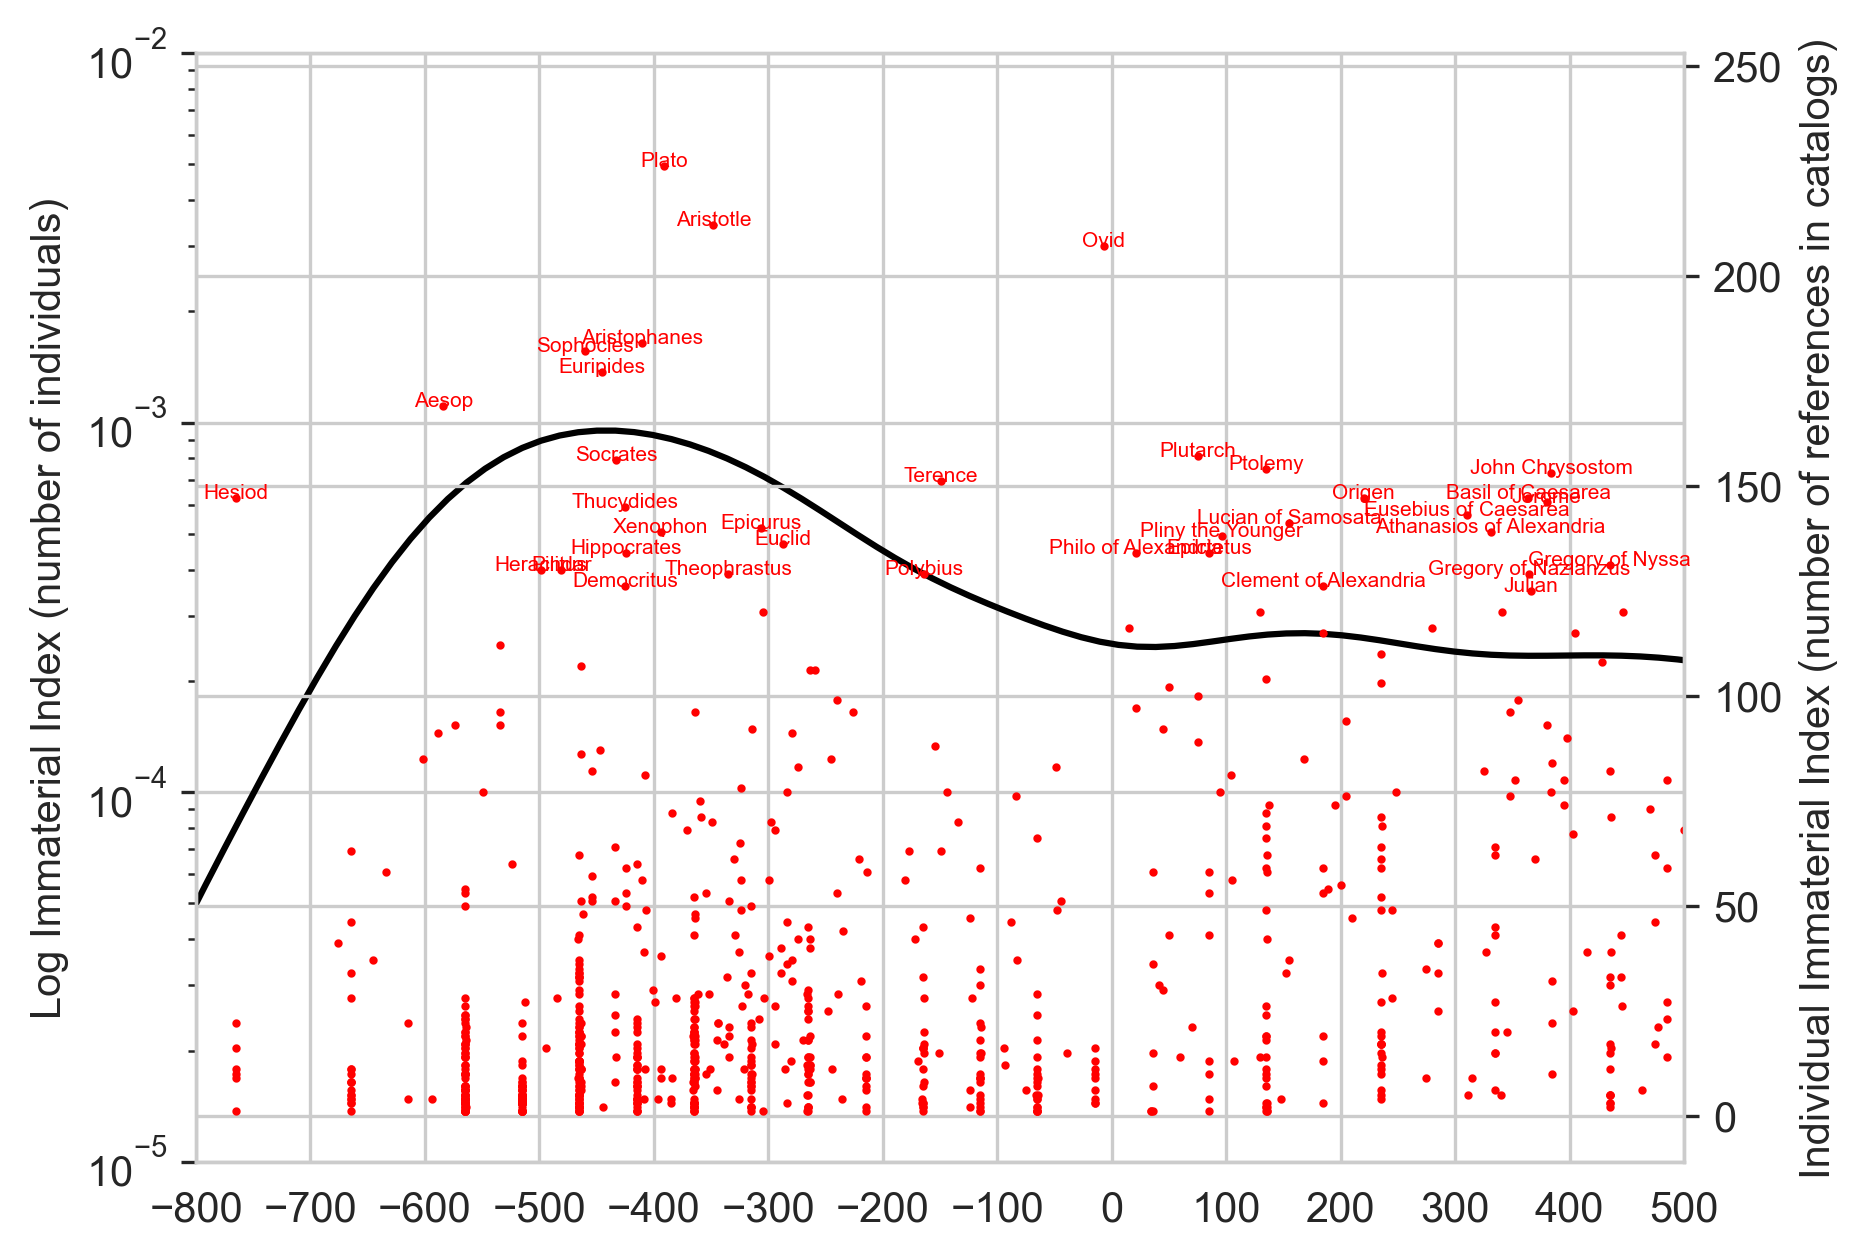

In [66]:
fig, ax1 = plt.subplots(dpi=300)

sns.kdeplot(cultura_greek_world['birthyear_plus35'], color='black', bw_adjust=0.4, ax=ax1)
# Show the plot
ax1.set_yscale('log')
ax1.set_xlim(-800,500)
ax1.set_xticks(range(-800,600,100))
ax1.set_ylim(1e-5, 1e-2)
ax1.set_ylabel("Log Immaterial Index (number of individuals)")
ax1.set_xlabel("")

ax2 = ax1.twinx()

max = cultura_greek_world["identifier_score"].max()
plt.scatter(cultura_greek_world["birthyear_plus35"], cultura_greek_world["identifier_score"], color="red", s=1)
for i, txt in enumerate(cultura_greek_world["individual_name_x"]):
    if cultura_greek_world["identifier_score"].iloc[i] > (max/2):
        ax2.annotate(txt, (cultura_greek_world["birthyear_plus35"].iloc[i], cultura_greek_world["identifier_score"].iloc[i]), ha="center", fontsize=5, color="red")
ax2.set_ylabel("Individual Immaterial Index (number of references in catalogs)")

In [67]:
fig.savefig("am_figures/cultura_greek_world.png")

Text(0, 0.5, 'Individual Immaterial Index (number of references in catalogs)')

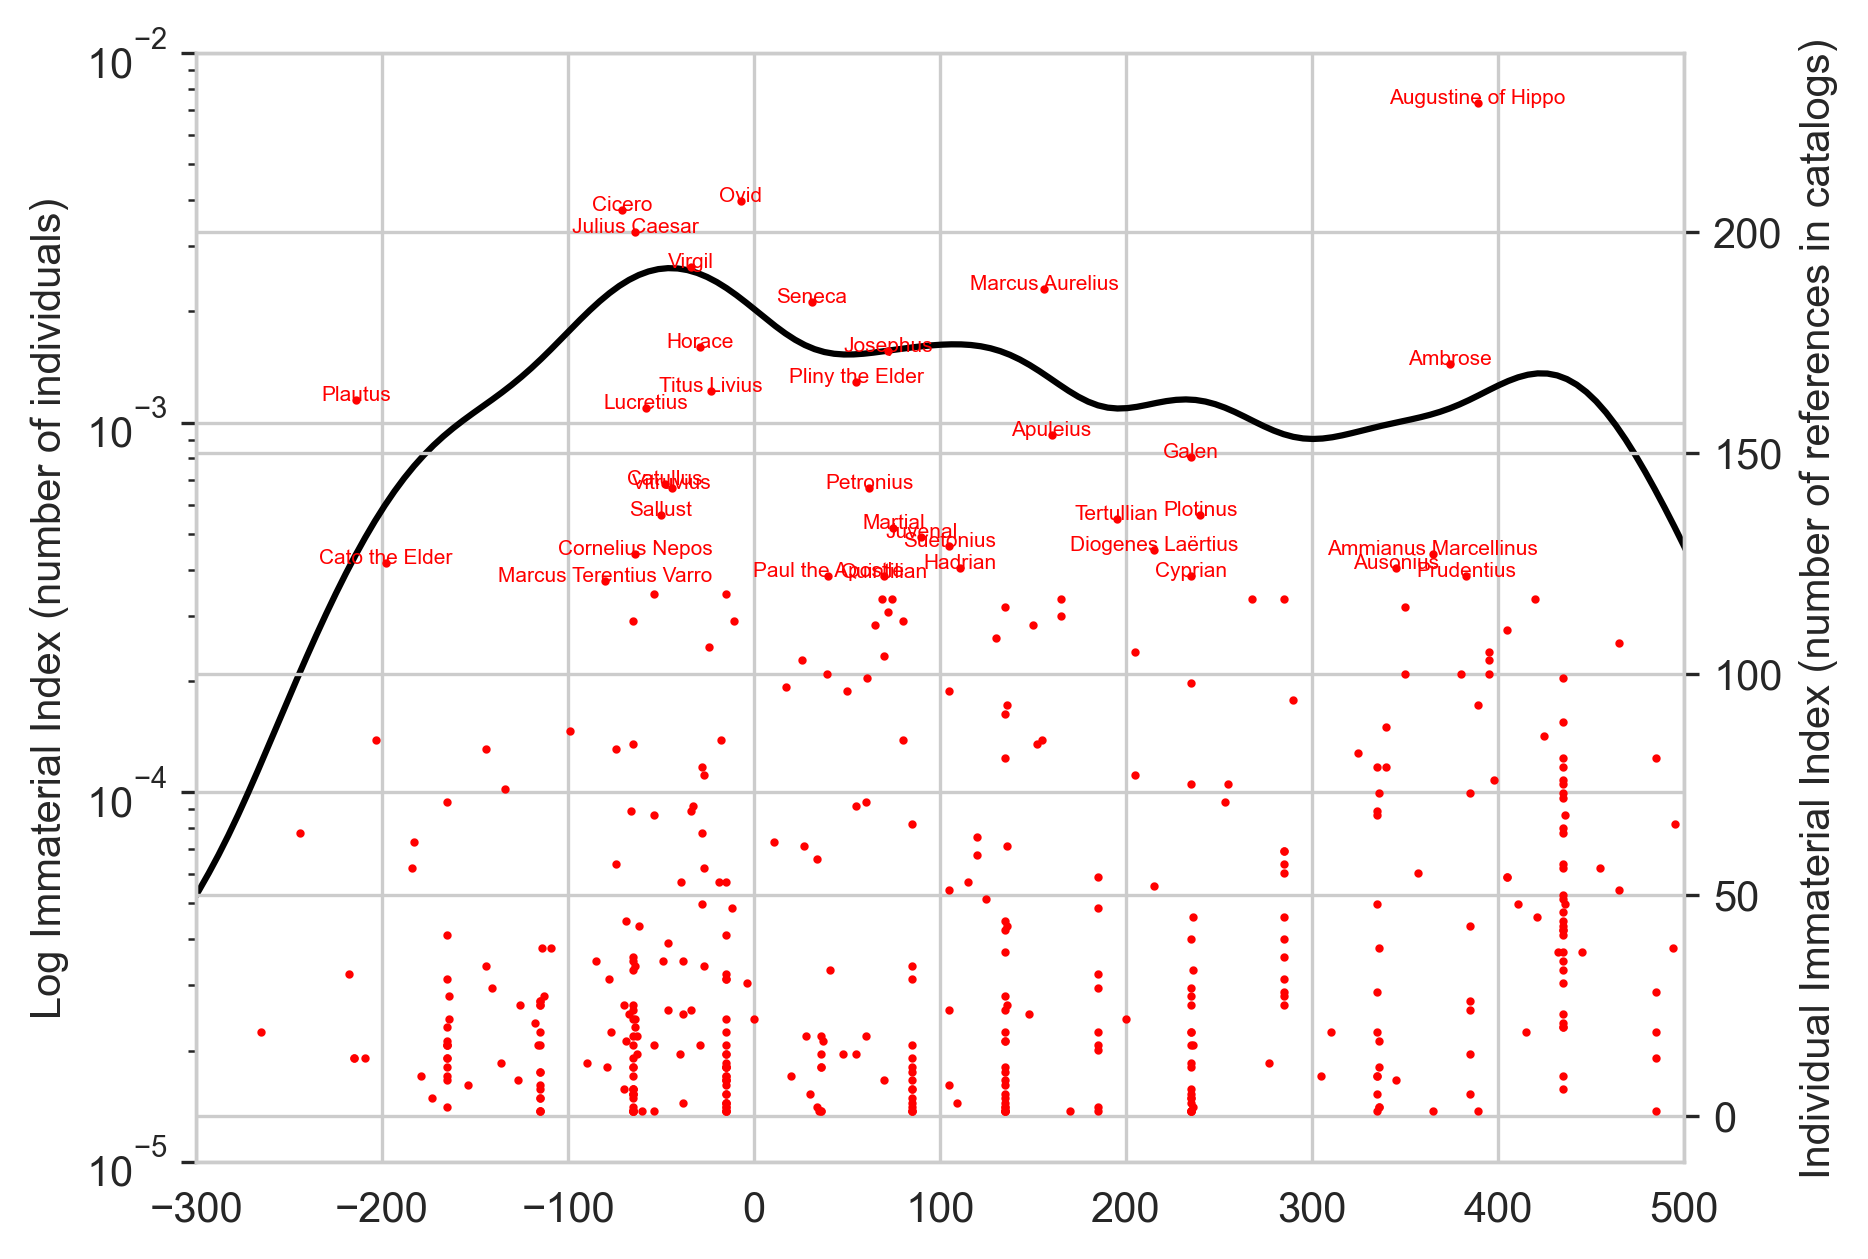

In [34]:
fig, ax1 = plt.subplots(dpi=300)

sns.kdeplot(cultura_latin_world['birthyear_plus35'], color='black', bw_adjust=0.6, ax=ax1)
# Show the plot
ax1.set_yscale('log')
ax1.set_xlim(-300,500)
ax1.set_xticks(range(-300,600,100))
ax1.set_ylim(1e-5, 1e-2)
ax1.set_ylabel("Log Immaterial Index (number of individuals)")
ax1.set_xlabel("")

ax2 = ax1.twinx()
max = cultura_greek_world["identifier_score"].max()
plt.scatter(cultura_latin_world["birthyear_plus35"], cultura_latin_world["identifier_score"], color="red", s=1)
for i, txt in enumerate(cultura_latin_world["individual_name_x"]):
    if cultura_latin_world["identifier_score"].iloc[i] > (max/2):
        ax2.annotate(txt, (cultura_latin_world["birthyear_plus35"].iloc[i], cultura_latin_world["identifier_score"].iloc[i]), ha="center", fontsize=5, color="red")
ax2.set_ylabel("Individual Immaterial Index (number of references in catalogs)")

#ax.set_ylabel("Individual Immaterial Index (number of references in catalogs)")

In [35]:
fig.savefig("am_figures/cultura_latin_world.png")

## Epigraphic data

In [2]:
# either load the data from a local directory or load them directly from Zenodo and save them for future usage
try:
    LIST = gpd.read_parquet("large_files/LIST_v1-2.parquet")
    GIST = gpd.read_parquet("large_files/GIST_v1-1.parquet")
except:
    !curl https://zenodo.org/records/10473706/files/LIST_v1-2.parquet -o large_files/LIST_v1-2.parquet
    !curl https://zenodo.org/records/10139110/files/GIST_v1-1.parquet -o large_files/GIST_v1-1.parquet
    LIST = gpd.read_parquet("large_files/LIST_v1-2.parquet")
    GIST = gpd.read_parquet("large_files/GIST_v1-1.parquet")

Both datasets are GeoDataFrames.
Take a look at their structure.
For us are relevant especially three columns:
* "geometry" - point geometry using shapely standards
* "not_before" - starting point of the dating interval
* "not_after" - ending point of the dating interval 

In [3]:
GIST.head(5)

,PHI_ID,reference,metadata,lines,text_raw,text_iphi,clean_text_conservative,clean_text_interpretive_word,lemmata,raw_date,...,Latitude,TMgeo_name,geometry,polis_context_name,polis_context_size,polis_context_fame,urban_context,urban_context_city,urban_context_pop_est,is_geotemporal
0,1,IG I³\n1,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,12.0,ἔδοχσεν το͂ι δέμοι· τ̣[ὸς ἐ Σ]αλαμ̣[ῖνι κλερόχ...,εδοχσεν τοι δεμοι τ[ος ε σ]αλαμ[ινι κλεροχ]ος ...,ἔδοχσεν το͂ι δέμοι ταλαμος οἰκε͂ν ἐᾶ Σαλαμῖνι ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,"['ἔδοχσεν', 'το͂ι', 'δέμοι', 'τὸς', 'ἐ', 'Σαλα...",c. 510-500 a.,...,37.972747,Athenai,POINT (23.72399 37.97275),Athenai,5.0,20.87,large,Athenae,58112.0,True
1,4,IG I³\n4,Att. — stoich. 38 — 485/4 a.,56.0,[․․․․․․․․․․․․․․․․․․38․․․․․․․․․․․․․․․․․․]\n[․․․...,[--------------------------------------] [----...,δέ τις αν ἒ φρορὰν μ ντέκοντα δχμὰς τ ας ℎες π...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,"['ἐάν', 'τις', 'ἐν', 'ἒ', 'φρουρά', 'μή', 'πεν...",485/4 a.,...,37.972747,Athenai,POINT (23.72399 37.97275),Athenai,5.0,20.87,large,Athenae,58112.0,True
2,5,IG I³\n5,Att. — c. 500 a.,6.0,[ἔδοχσε]ν [⋮ τε͂ι βολε͂ι] ⋮ καὶ [τ]ο͂ι δέμοι ⋮...,[εδοχσε]ν [ τει βολει] και [τ]οι δεμοι οτε παρ...,ν καὶ ο͂ι δέμοι ℎότε Παραιβάτες λεια θν τὸς ℎι...,ἔδοχσεν τε͂ι βολε͂ι καὶ το͂ι δέμοι ℎότε Παραιβ...,"['δοκέω', 'βουλή', 'καὶ', 'ὁ', 'δῆμος', 'τε', ...",c. 500 a.,...,38.044135,Eleusis,POINT (23.5415 38.04414),Eleusis,1.0,1.37,small,Eleusis,1000.0,True
3,6,IG I³\n6,Att. — stoich. 23/11 — ante 460 a.,160.0,— — — — — — — — — — — — —\n[․․․․․․15․․․․․․․] δ...,------------- [---------------] δραχμεισ[ι ---...,δραχμε͂ιστες τὸς ιο μενος δεμο το͂ν πόλεο οκε͂...,δραχμε͂ισι τες τὸς ιο μενος δεμο το͂ν πόλεον δ...,"['δραχμός', 'τε', 'τὶς', 'μόνος', 'δῆμος', 'ὁ'...",ante 460 a.,...,38.044135,Eleusis,POINT (23.5415 38.04414),Eleusis,1.0,1.37,small,Eleusis,1000.0,True
4,11,IG I³\n11,Att. — stoich. 48 — ante med. s. V a.,22.0,[χσυμμαχία καὶ ℎόρ]κ̣ο̣[ς] Ἀ̣[θ]ε̣ν̣α̣[ίον κα]...,[χσυμμαχια και ορ]κο[ς] α[θ]ενα[ιον κα]ι εγεστ...,κο Ἀεναὶ Ἐγεσταί ο͂ι ἐπρυτάνευε οΙ ον ἐ͂ρχε Ἀ...,χσυμμαχία καὶ ℎόρκος Ἀθεναίον καὶ Ἐγεσταίον ἔδ...,"['συμμαχία', 'καὶ', 'ὅρκος', 'φθινάς', 'καὶ', ...",ante med. s. V a.,...,37.972747,Athenai,POINT (23.72399 37.97275),Athenai,5.0,20.87,large,Athenae,58112.0,True


In [4]:
print(len(GIST))
print(len(LIST))

217863
525870


It is useful to filter only those which have both temporal and spatial information. 

In [5]:
GIST = GIST[GIST["is_geotemporal"]==True]
LIST = LIST[LIST["is_geotemporal"]==True]
print(len(GIST))
print(len(LIST))

106898
206570


Now we generate random dates using the tempun library. This way we get 100 variants os possible date of origin for each inscription.

In [6]:
LIST["random_dates"] = LIST.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], size=100), axis=1)
GIST["random_dates"] = GIST.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], size=100), axis=1)

If we take one random date for each inscription, we get one possible time series distribution for the whole dataset and it can be subjected for correlation. This is basically what we do with the `tempun` library when generating the plots below.

Thus, for instance, you can easily extruct two time series data for a subset of inscriptions (e.g. a random sample) like this:

In [16]:
GIST_dates_v1 = GIST.sample(5000)["random_dates"].apply(lambda x: x[0]).tolist()
GIST_dates_v2 = GIST.sample(5000)["random_dates"].apply(lambda x: x[1]).tolist()

In [20]:
# now you have just the dates in form of singular year.
print(GIST_dates_v1[:100])

[-526, 190, 233, 544, -173, -205, 224, 188, -221, -552, 201, 101, -389, 78, -479, -135, -244, -285, -202, -76, -78, -336, 313, -158, -23, -290, 22, -231, -275, 121, -420, -334, 166, 159, -159, -164, -84, -79, -484, -148, -39, -120, 285, 23, -269, -184, 449, 113, 84, 219, -172, 404, -206, -211, 935, -425, 34, -408, -450, -186, 257, -239, -389, 461, 65, -523, 210, 128, -284, -101, -38, -135, 460, -172, -286, -482, 165, 203, 177, -375, -197, 486, -184, -280, 507, -139, 220, 275, 243, 19, -28, 76, -243, 147, 353, -23, -270, -357, -210, -76]


Then you can plot them next to each other using KDE plot:

(-800.0, 600.0)

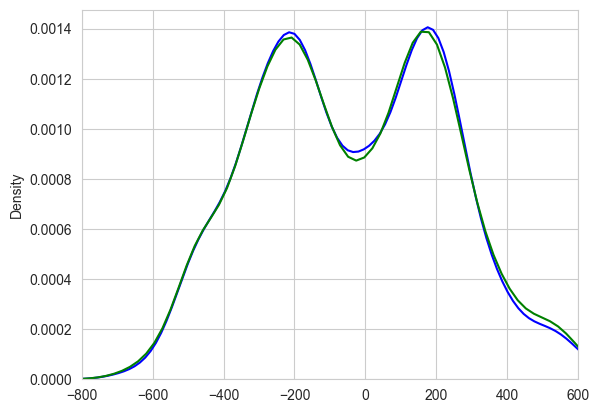

In [17]:
fig, ax = plt.subplots()
sns.kdeplot(GIST_dates_v1, color="blue", ax=ax)
sns.kdeplot(GIST_dates_v2, color="green", ax=ax)

ax.set_xlim(-800, 600)

In case there is a higher extent of temporal 

Let's plot the spatial distribution of the Greek and Latin inscriptions within the Greek and Latin world respectively.


In [21]:
greek_world_gdf = gpd.read_file("greek_world_gdf.geojson")
greek_world_uu = greek_world_gdf.geometry.union_all

latin_world_gdf = gpd.read_file("latin_world_gdf.geojson")
latin_world_uu = latin_world_gdf.geometry.union_all

(-8.144582351807436, 51.855417648192564, 6.267360648000015, 66.26736064800002)

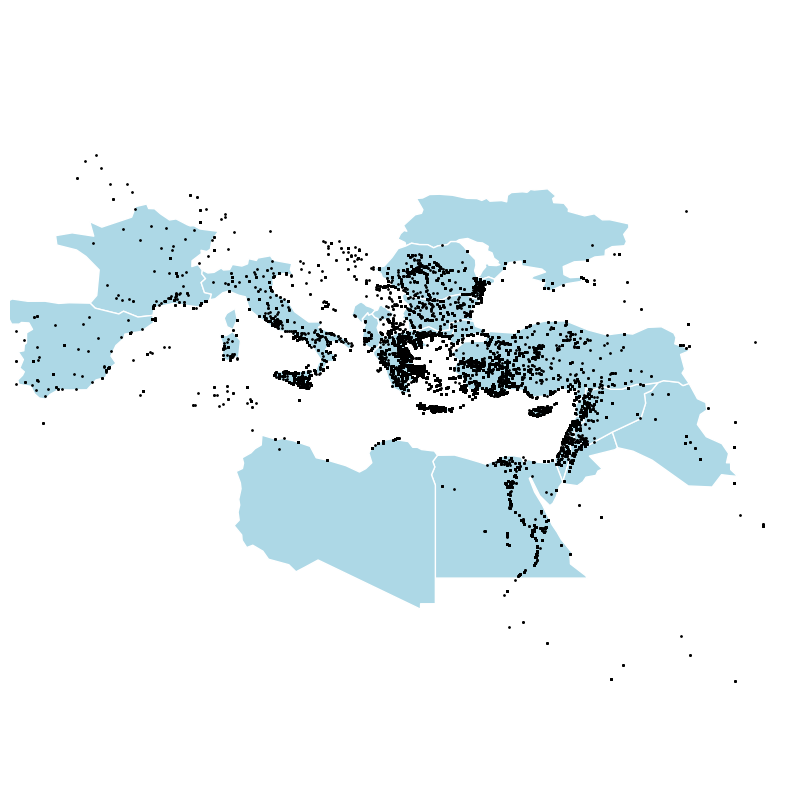

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
# ax.set_title(region_code)

greek_world_gdf.plot(ax=ax, color="lightblue")
GIST.plot(ax=ax, markersize=1, color="black")

# Calculate the centroid of the region's geometries
region_centroid = greek_world_gdf.geometry.union_all().centroid
# Set the aspect ratio to be equal for a square plot
ax.set_aspect('equal')
# Set the map extent based on the region's centroid

n = 30
ax.set_xlim([region_centroid.x - n, region_centroid.x + n])
ax.set_ylim([region_centroid.y - n, region_centroid.y + n])

ax.axis('off')  # Hide the axis

(-26.91322221063255, 48.08677778936745, 7.571577037932457, 67.57157703793246)

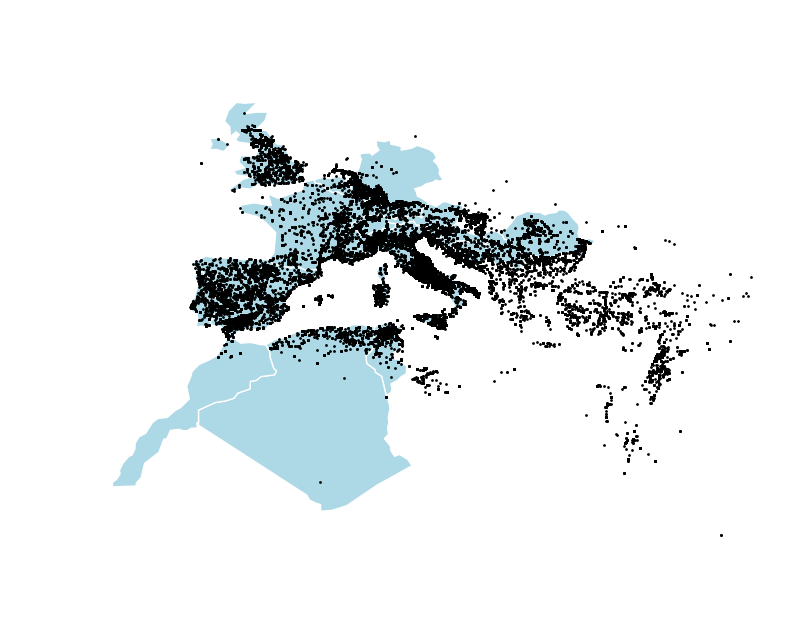

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
# ax.set_title(region_code)

latin_world_gdf.plot(ax=ax, color="lightblue")
LIST.plot(ax=ax, markersize=1, color="black")

# Calculate the centroid of the region's geometries
region_centroid = latin_world_gdf.geometry.union_all().centroid
# Set the aspect ratio to be equal for a square plot
ax.set_aspect('equal')
# Set the map extent based on the region's centroid

n = 30
ax.set_xlim([region_centroid.x - n, region_centroid.x + n * 1.5])
ax.set_ylim([region_centroid.y - n, region_centroid.y + n])

ax.axis('off')  # Hide the axis

Ok, perhaps it has more sense to focus only on inscriptions within these regional boundaries.

In [24]:
GIST = gpd.sjoin(GIST, greek_world_gdf, predicate='within', how='left')
LIST = gpd.sjoin(LIST, latin_world_gdf, predicate='within', how='left')

In [25]:
(LIST["name"] == "Italy").sum()

125375

In [26]:
def filter_by_country_temporal_inclusion(row):
    try:
        not_before = row["not_before"]
        not_after = row["not_after"]
        if pd.isna(not_before):
            not_before = float('-inf')
        if pd.isna(not_after):
            not_after = float('inf')
        return (not_before <= row["max_date"]) & (not_after >= row["min_date"])
    except:
        return False
GIST["inscr_greek_world"] = GIST.apply(lambda x: filter_by_country_temporal_inclusion(x), axis=1)
LIST["inscr_latin_world"] = LIST.apply(lambda x: filter_by_country_temporal_inclusion(x), axis=1)

In [27]:
# how many Greek inscriptions from the Greek World are there?
GIST["inscr_greek_world"].sum()

75499

In [28]:
# what proportion of GIST inscriptions is from the Greek World covered here?
GIST["inscr_greek_world"].sum() / len(GIST)

0.7062713989036278

In [29]:
# how many Latin inscriptions from the Latin World are there?
LIST["inscr_latin_world"].sum()

183205

In [30]:
# what proportion of LIST inscriptions is from the Latin World covered here?
LIST["inscr_latin_world"].sum() / len(LIST)

0.8868906423972504

(-8.144582351807436, 51.855417648192564, 6.267360648000015, 66.26736064800002)

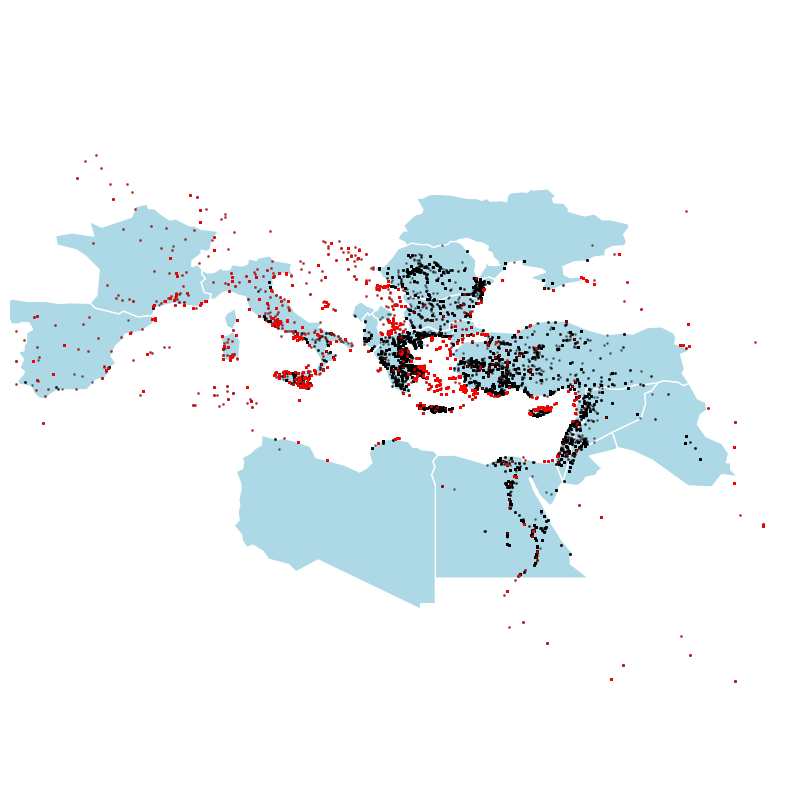

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
# ax.set_title(region_code)

greek_world_gdf.plot(ax=ax, color="lightblue")
GIST.plot(ax=ax, markersize=1, color="black", alpha=0.4)
GIST[~GIST["inscr_greek_world"]].plot(ax=ax, markersize=1, color="red", alpha=0.4)


# Calculate the centroid of the region's geometries
region_centroid = greek_world_gdf.geometry.union_all().centroid
# Set the aspect ratio to be equal for a square plot
ax.set_aspect('equal')
# Set the map extent based on the region's centroid

n = 30
ax.set_xlim([region_centroid.x - n, region_centroid.x + n])
ax.set_ylim([region_centroid.y - n, region_centroid.y + n])

ax.axis('off')  # Hide the axis

In [33]:
fig.savefig("am_figures/greek_world_inscriptions.png")

(-16.91322221063255, 33.08677778936745, 17.571577037932457, 57.57157703793246)

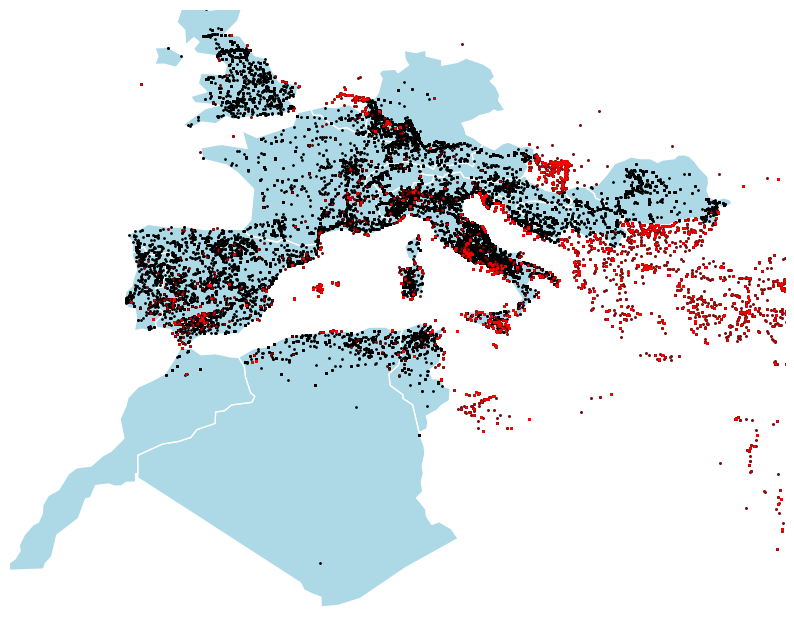

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))
# ax.set_title(region_code)

latin_world_gdf.plot(ax=ax, color="lightblue")
LIST.plot(ax=ax, markersize=1, color="black")
LIST[~LIST["inscr_latin_world"]].plot(ax=ax, markersize=1, color="red", alpha=0.4)

# Calculate the centroid of the region's geometries
region_centroid = latin_world_gdf.geometry.union_all().centroid
# Set the aspect ratio to be equal for a square plot
ax.set_aspect('equal')
# Set the map extent based on the region's centroid

n = 20
ax.set_xlim([region_centroid.x - n, region_centroid.x + n * 1.5])
ax.set_ylim([region_centroid.y - n, region_centroid.y + n])

ax.axis('off')  # Hide the axis

In [37]:
fig.savefig("am_figures/latin_world_inscriptions.png")

NameError: name 'cultura_greek_world' is not defined

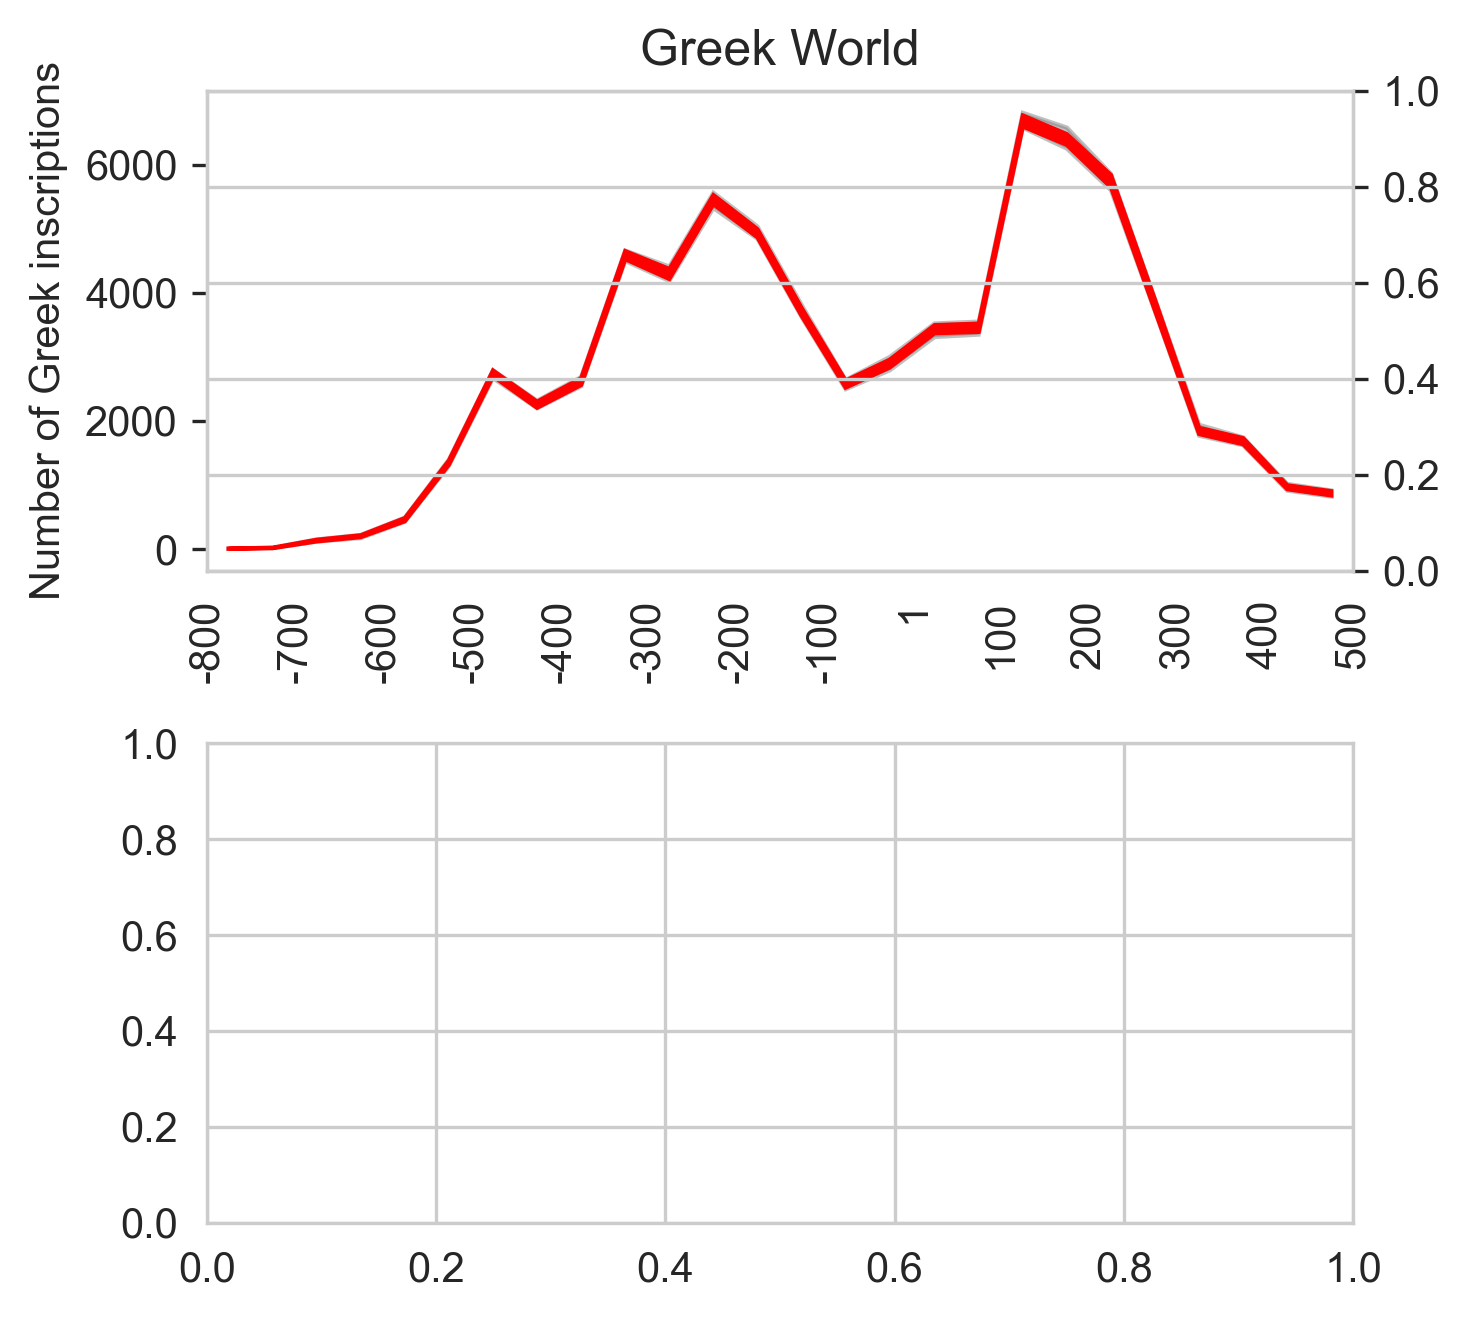

In [39]:
fig, [ax1, ax3] = plt.subplots(2,1, figsize=(5,4.5), dpi=300, tight_layout=True)

ax1.set_title("Greek World")
tempun.timeblocksplot_from_randoms(GIST[GIST["inscr_greek_world"]]["random_dates"], color="red", timeblocks=[-800,500,50], ax=ax1, zorder=2)
ax1.set_xlim(-800,500)
ax1.set_xticks(range(-800, 600, 100))
xticks = [n + 1 if n==0 else n for n in range(-800, 600, 100) ]
ax1.set_xticks(xticks)
ax1.set_xticklabels([str(n) for n in xticks], rotation=90)
ax1.set_ylabel("Number of Greek inscriptions")

ax1.grid(False) # put grids behind

ax2 = ax1.twinx()

sns.kdeplot(cultura_greek_world['birthyear_plus35'], color='black', bw_adjust=0.4, ax=ax2, zorder=10)
# Show the plot
ax2.set_yscale('log')
ax2.set_ylim(1e-5, 1e-2)
ax2.set_ylabel("Log Immaterial Index\n(number of individuals)")
ax2.set_xlabel("")
ax2.grid(False) # turn off gridlines

ax3.set_title("Latin World")
tempun.timeblocksplot_from_randoms(LIST[LIST["inscr_latin_world"]]["random_dates"], color="green", timeblocks=[-300,500,50], ax=ax3, zorder=2)
ax3.set_xlim(-300,500)
xticks = [n + 1 if n==0 else n for n in range(-300, 600, 100) ]
ax3.set_xticks(xticks)
ax3.set_xticklabels([str(n) for n in xticks], rotation=90)
ax3.set_ylabel("Number of Latin inscriptions")

ax3.grid(False) # put grids behind


ax4 = ax3.twinx()

sns.kdeplot(cultura_latin_world['birthyear_plus35'], color='black', bw_adjust=0.4, ax=ax4, zorder=10)
# Show the plot
ax4.set_yscale('log')
ax4.set_ylim(1e-5, 1e-2)
ax4.set_ylabel("Log Immaterial Index\n(number of individuals)")
ax4.set_xlabel("")
ax4.grid(False) # turn off gridlines

In [116]:
fig.savefig("am_figures/greek&latin_world_cultura&inscriptions")

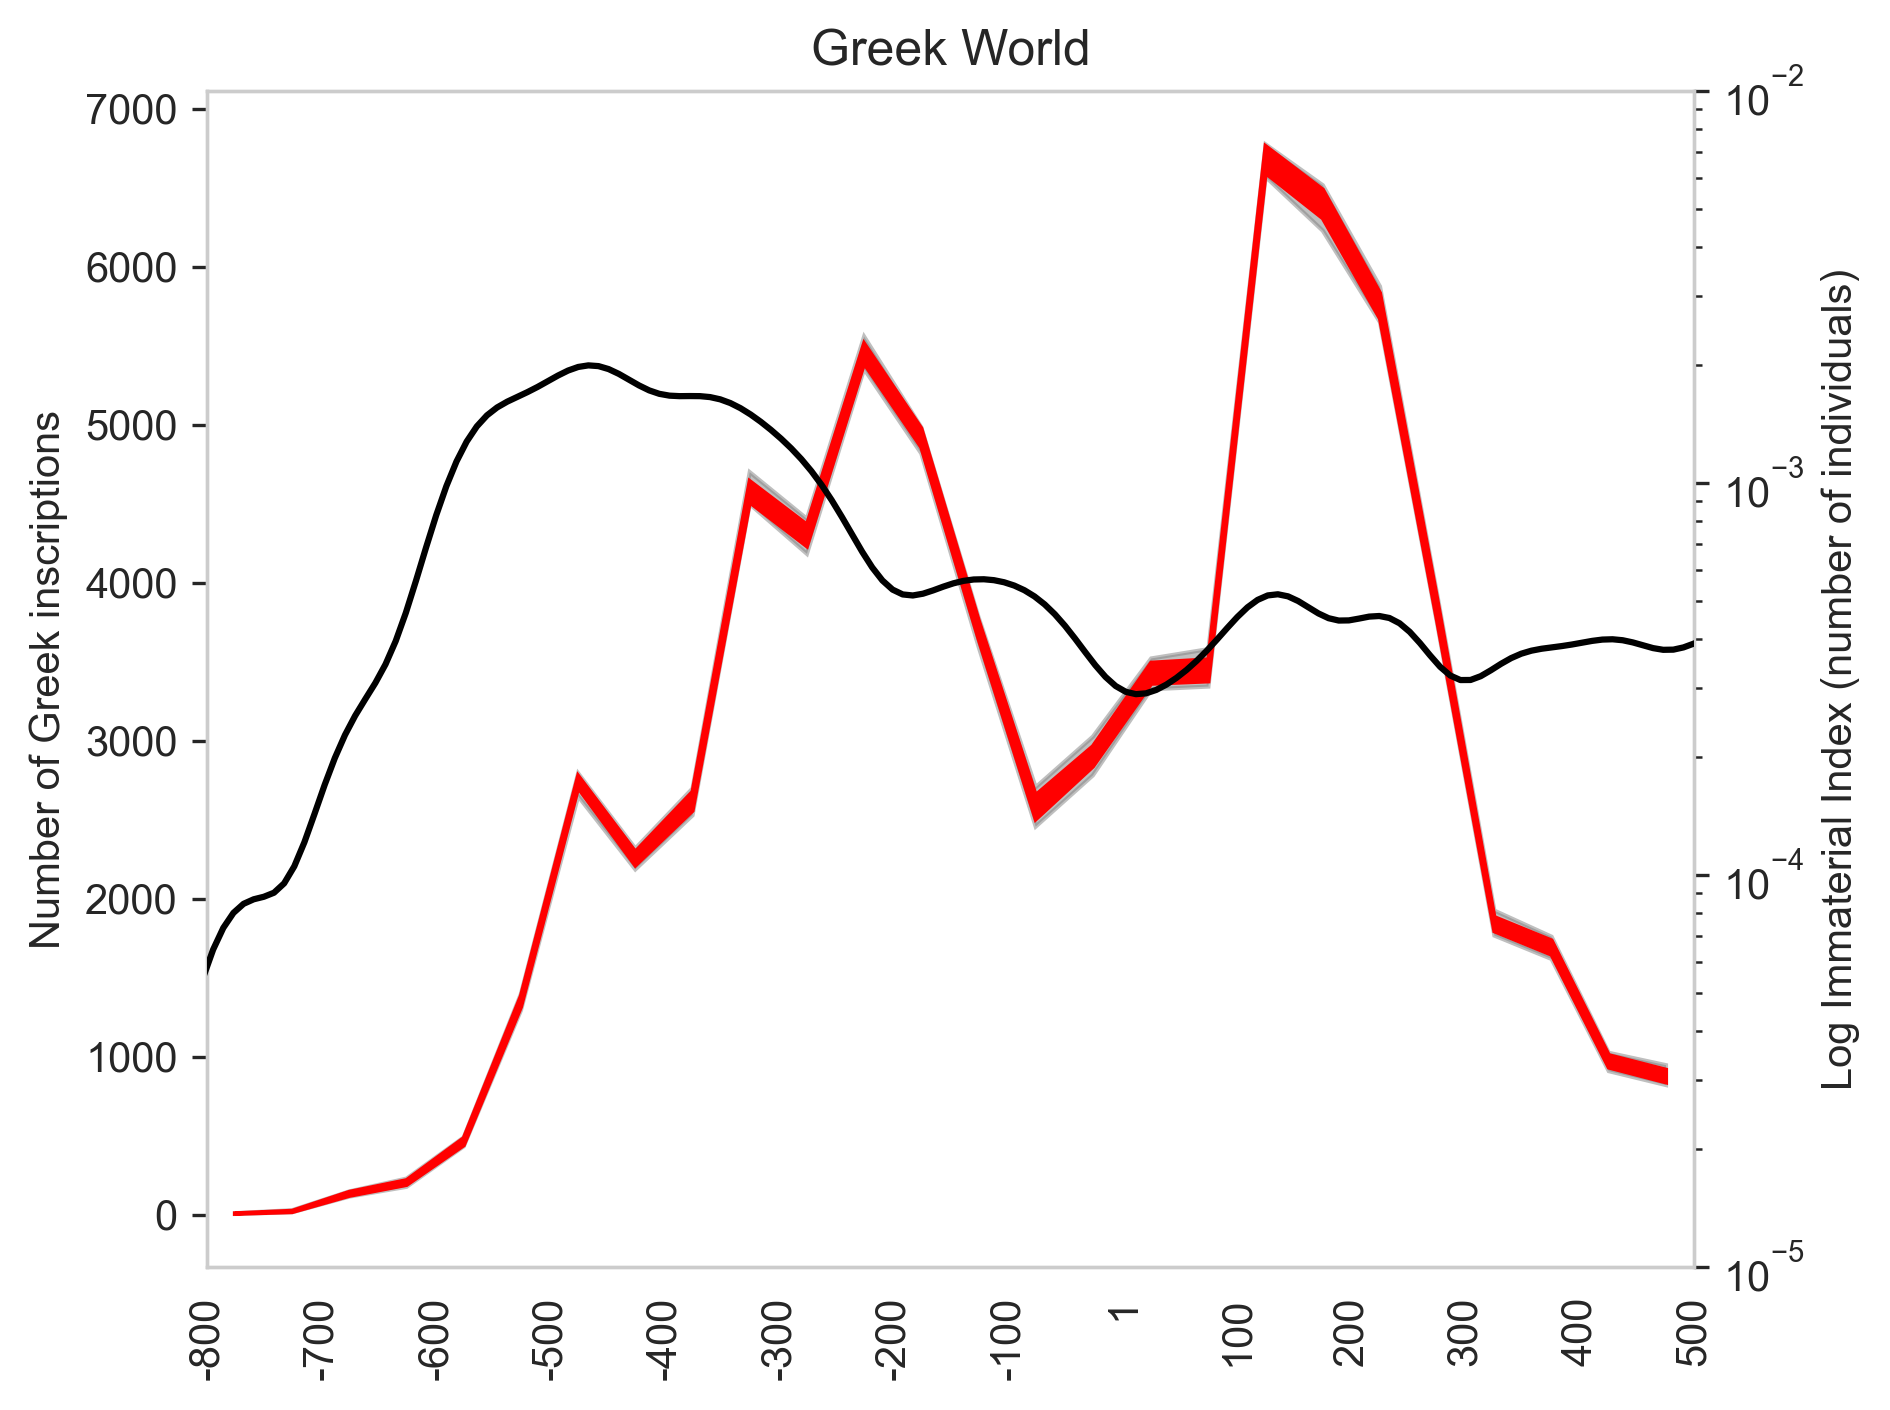

In [123]:
fig, ax1 = plt.subplots(dpi=300, tight_layout=True)

ax1.set_title("Greek World")
tempun.timeblocksplot_from_randoms(GIST[GIST["inscr_greek_world"]]["random_dates"], color="red", timeblocks=[-800,500,50], ax=ax1, zorder=2)
ax1.set_xlim(-800,500)
ax1.set_xticks(range(-800, 600, 100))
xticks = [n + 1 if n==0 else n for n in range(-800, 600, 100) ]
ax1.set_xticks(xticks)
ax1.set_xticklabels([str(n) for n in xticks], rotation=90)
ax1.set_ylabel("Number of Greek inscriptions")

ax1.grid(False) # put grids behind

ax2 = ax1.twinx()

sns.kdeplot(cultura_greek_world['birthyear_plus35'], color='black', bw_adjust=0.4, ax=ax2, zorder=10)
# Show the plot
ax2.set_yscale('log')
ax2.set_ylim(1e-5, 1e-2)
ax2.set_ylabel("Log Immaterial Index (number of individuals)")
ax2.set_xlabel("")
ax2.grid(False) # turn off gridlines

In [124]:
fig.savefig("am_figures/greek_world_cultura&inscriptions")

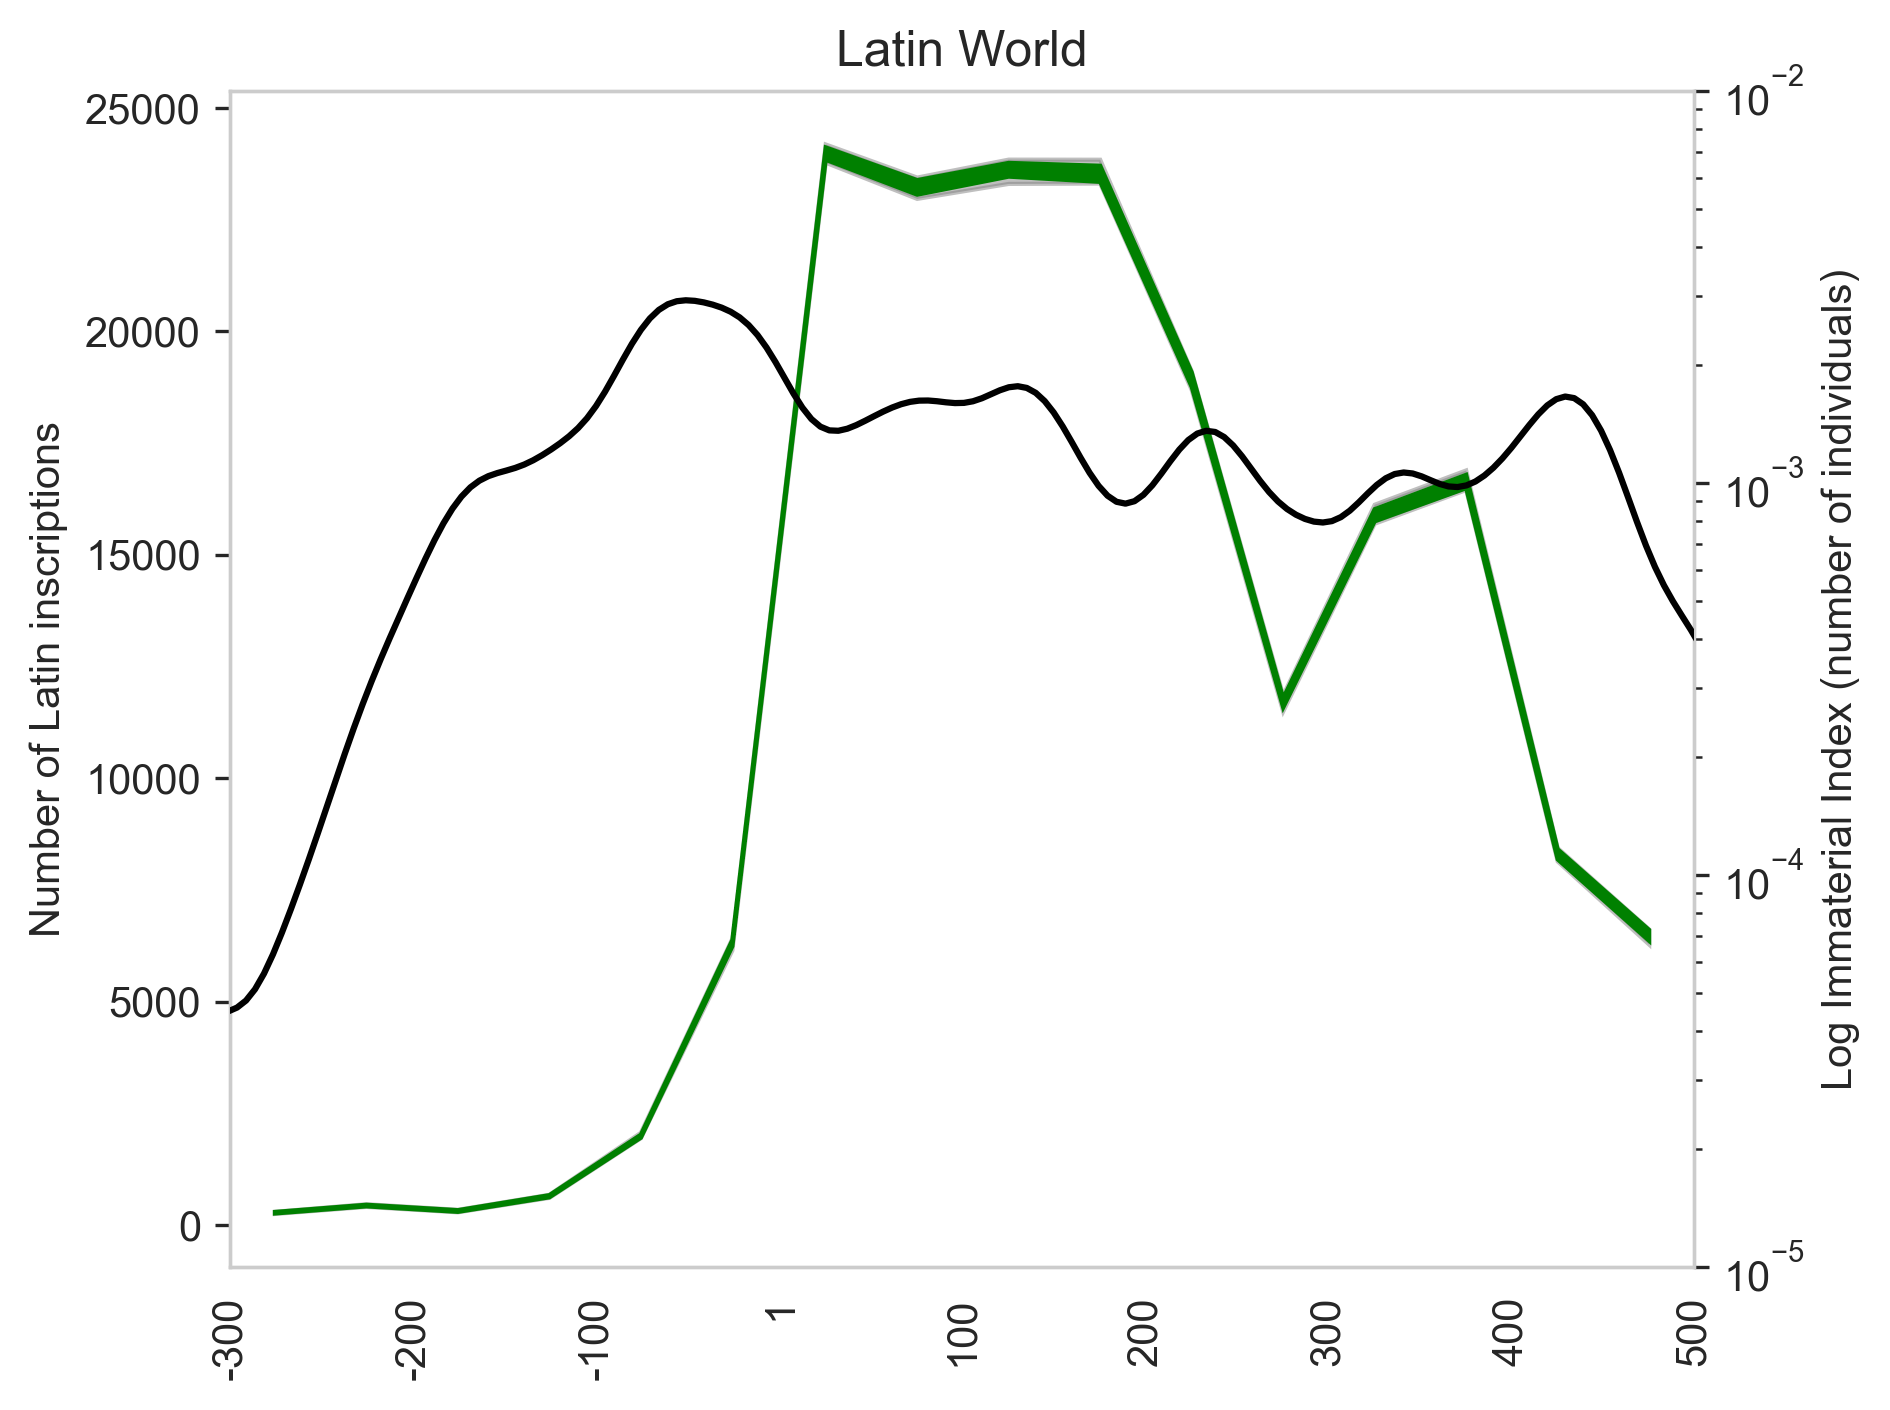

In [127]:
fig, ax3 = plt.subplots(dpi=300, tight_layout=True)

ax3.set_title("Latin World")
tempun.timeblocksplot_from_randoms(LIST[LIST["inscr_latin_world"]]["random_dates"], color="green", timeblocks=[-300,500,50], ax=ax3, zorder=2)
ax3.set_xlim(-300,500)
xticks = [n + 1 if n==0 else n for n in range(-300, 600, 100) ]
ax3.set_xticks(xticks)
ax3.set_xticklabels([str(n) for n in xticks], rotation=90)
ax3.set_ylabel("Number of Latin inscriptions")

ax3.grid(False) # put grids behind


ax4 = ax3.twinx()

sns.kdeplot(cultura_latin_world['birthyear_plus35'], color='black', bw_adjust=0.4, ax=ax4, zorder=10)
# Show the plot
ax4.set_yscale('log')
ax4.set_ylim(1e-5, 1e-2)
ax4.set_ylabel("Log Immaterial Index (number of individuals)")
ax4.set_xlabel("")
ax4.grid(False) # turn off gridlines

In [40]:
fig.savefig("am_figures/latin_world_cultura&inscriptions")

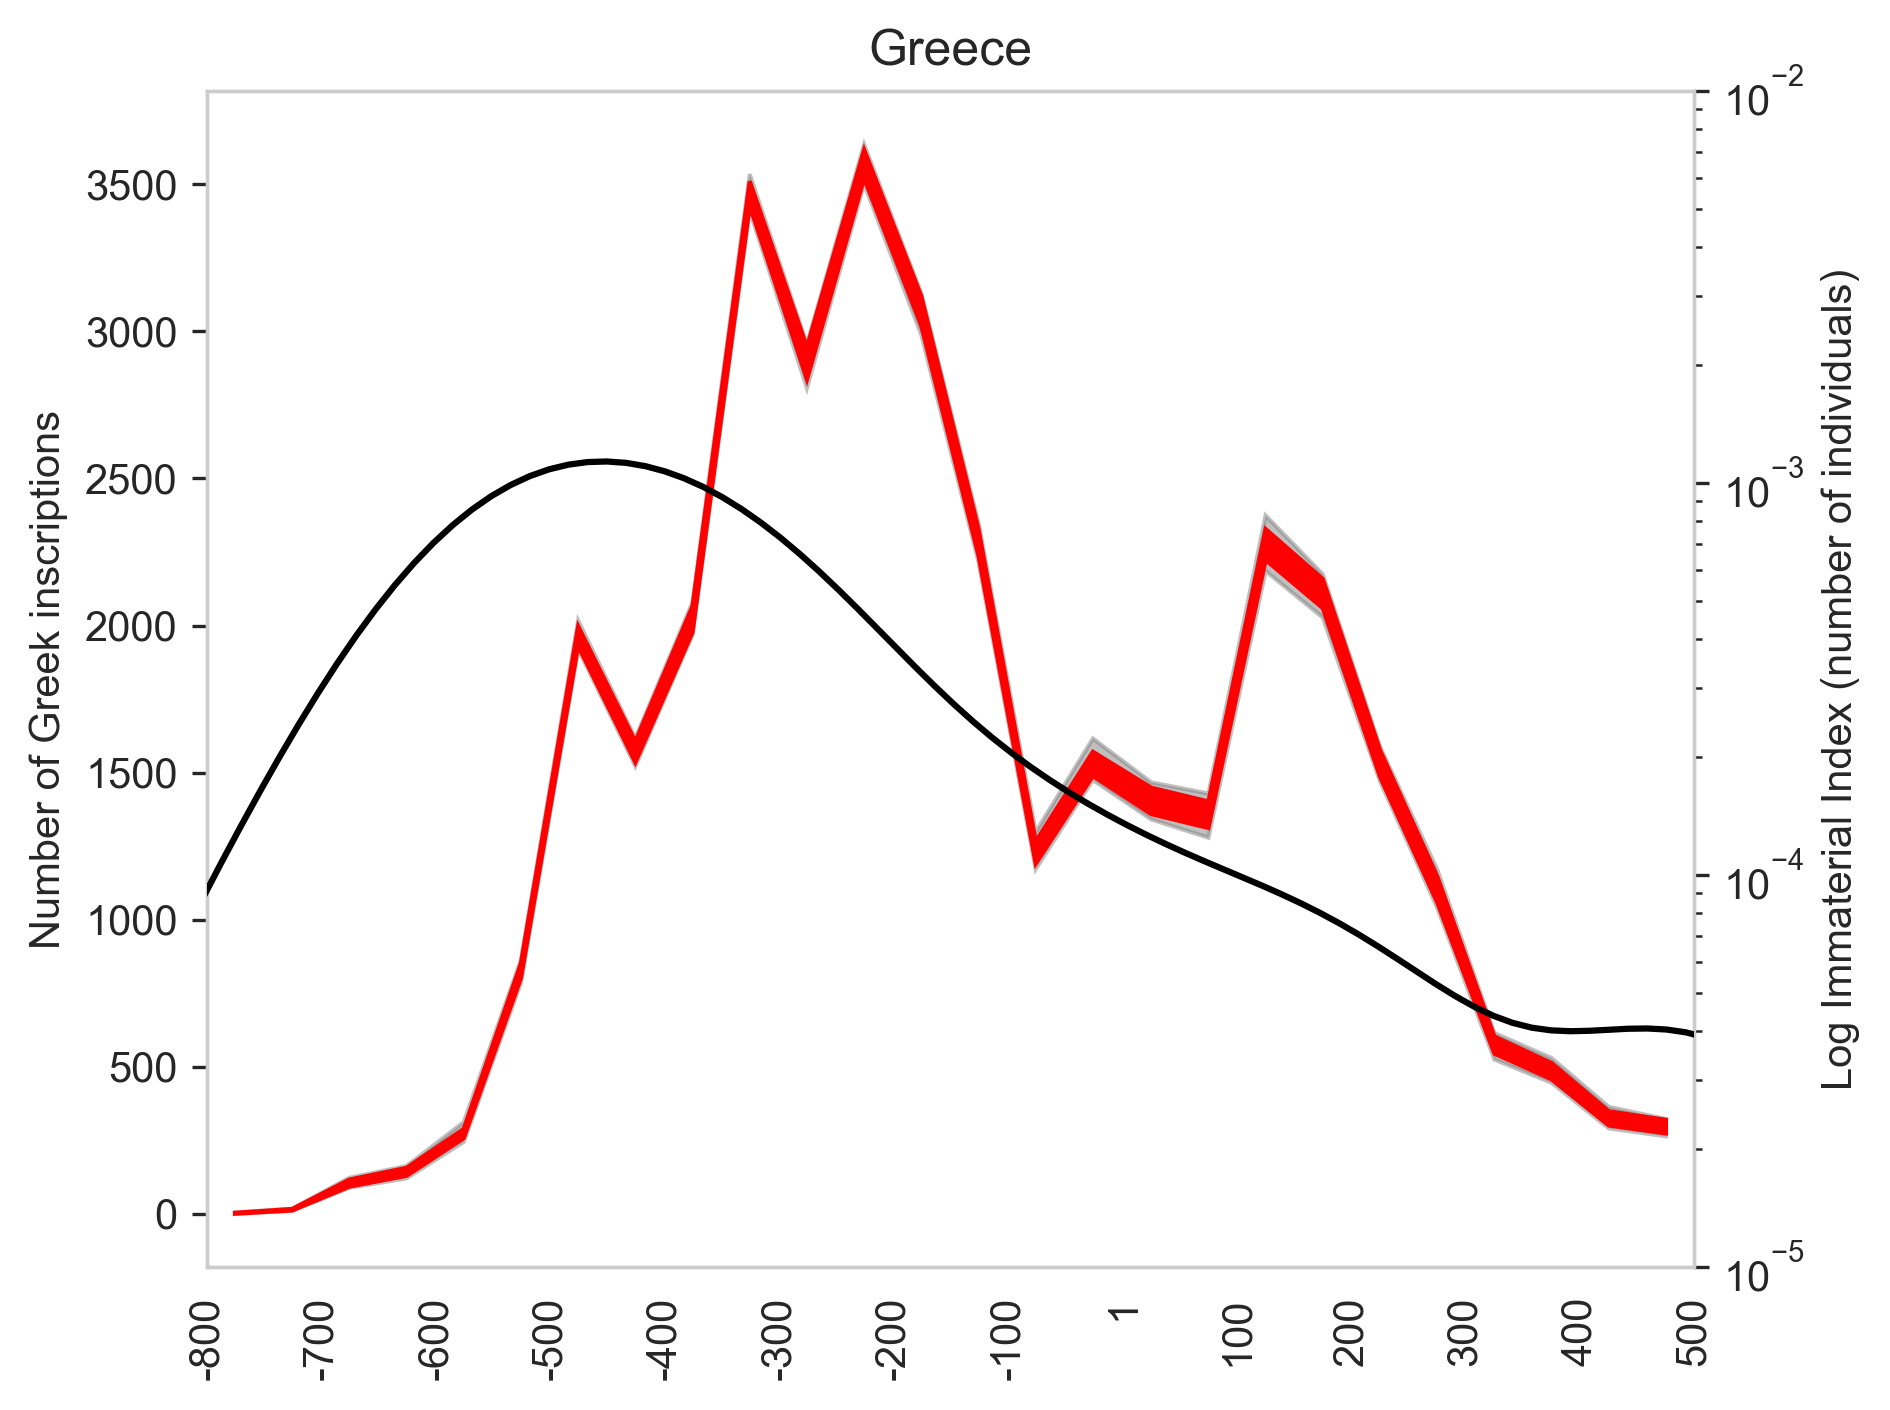

In [68]:
fig, ax1 = plt.subplots(dpi=300, tight_layout=True)

ax1.set_title("Greece")
tempun.timeblocksplot_from_randoms(GIST[GIST["name"]=="Greece"]["random_dates"], color="red", timeblocks=[-800,500,50], ax=ax1, zorder=2)
ax1.set_xlim(-800,500)
ax1.set_xticks(range(-800, 600, 100))
xticks = [n + 1 if n==0 else n for n in range(-800, 600, 100) ]
ax1.set_xticks(xticks)
ax1.set_xticklabels([str(n) for n in xticks], rotation=90)
ax1.set_ylabel("Number of Greek inscriptions")

ax1.grid(False) # put grids behind

ax2 = ax1.twinx()

sns.kdeplot(cultura_greek_world[cultura_greek_world["country_name"]=="Greece"]['birthyear_plus35'], color='black', bw_adjust=0.4, ax=ax2, zorder=10)
# Show the plot
ax2.set_yscale('log')
ax2.set_ylim(1e-5, 1e-2)
ax2.set_ylabel("Log Immaterial Index (number of individuals)")
ax2.set_xlabel("")
ax2.grid(False) # turn off gridlines


In [132]:
fig.savefig("am_figures/greece_cultura&inscriptions")

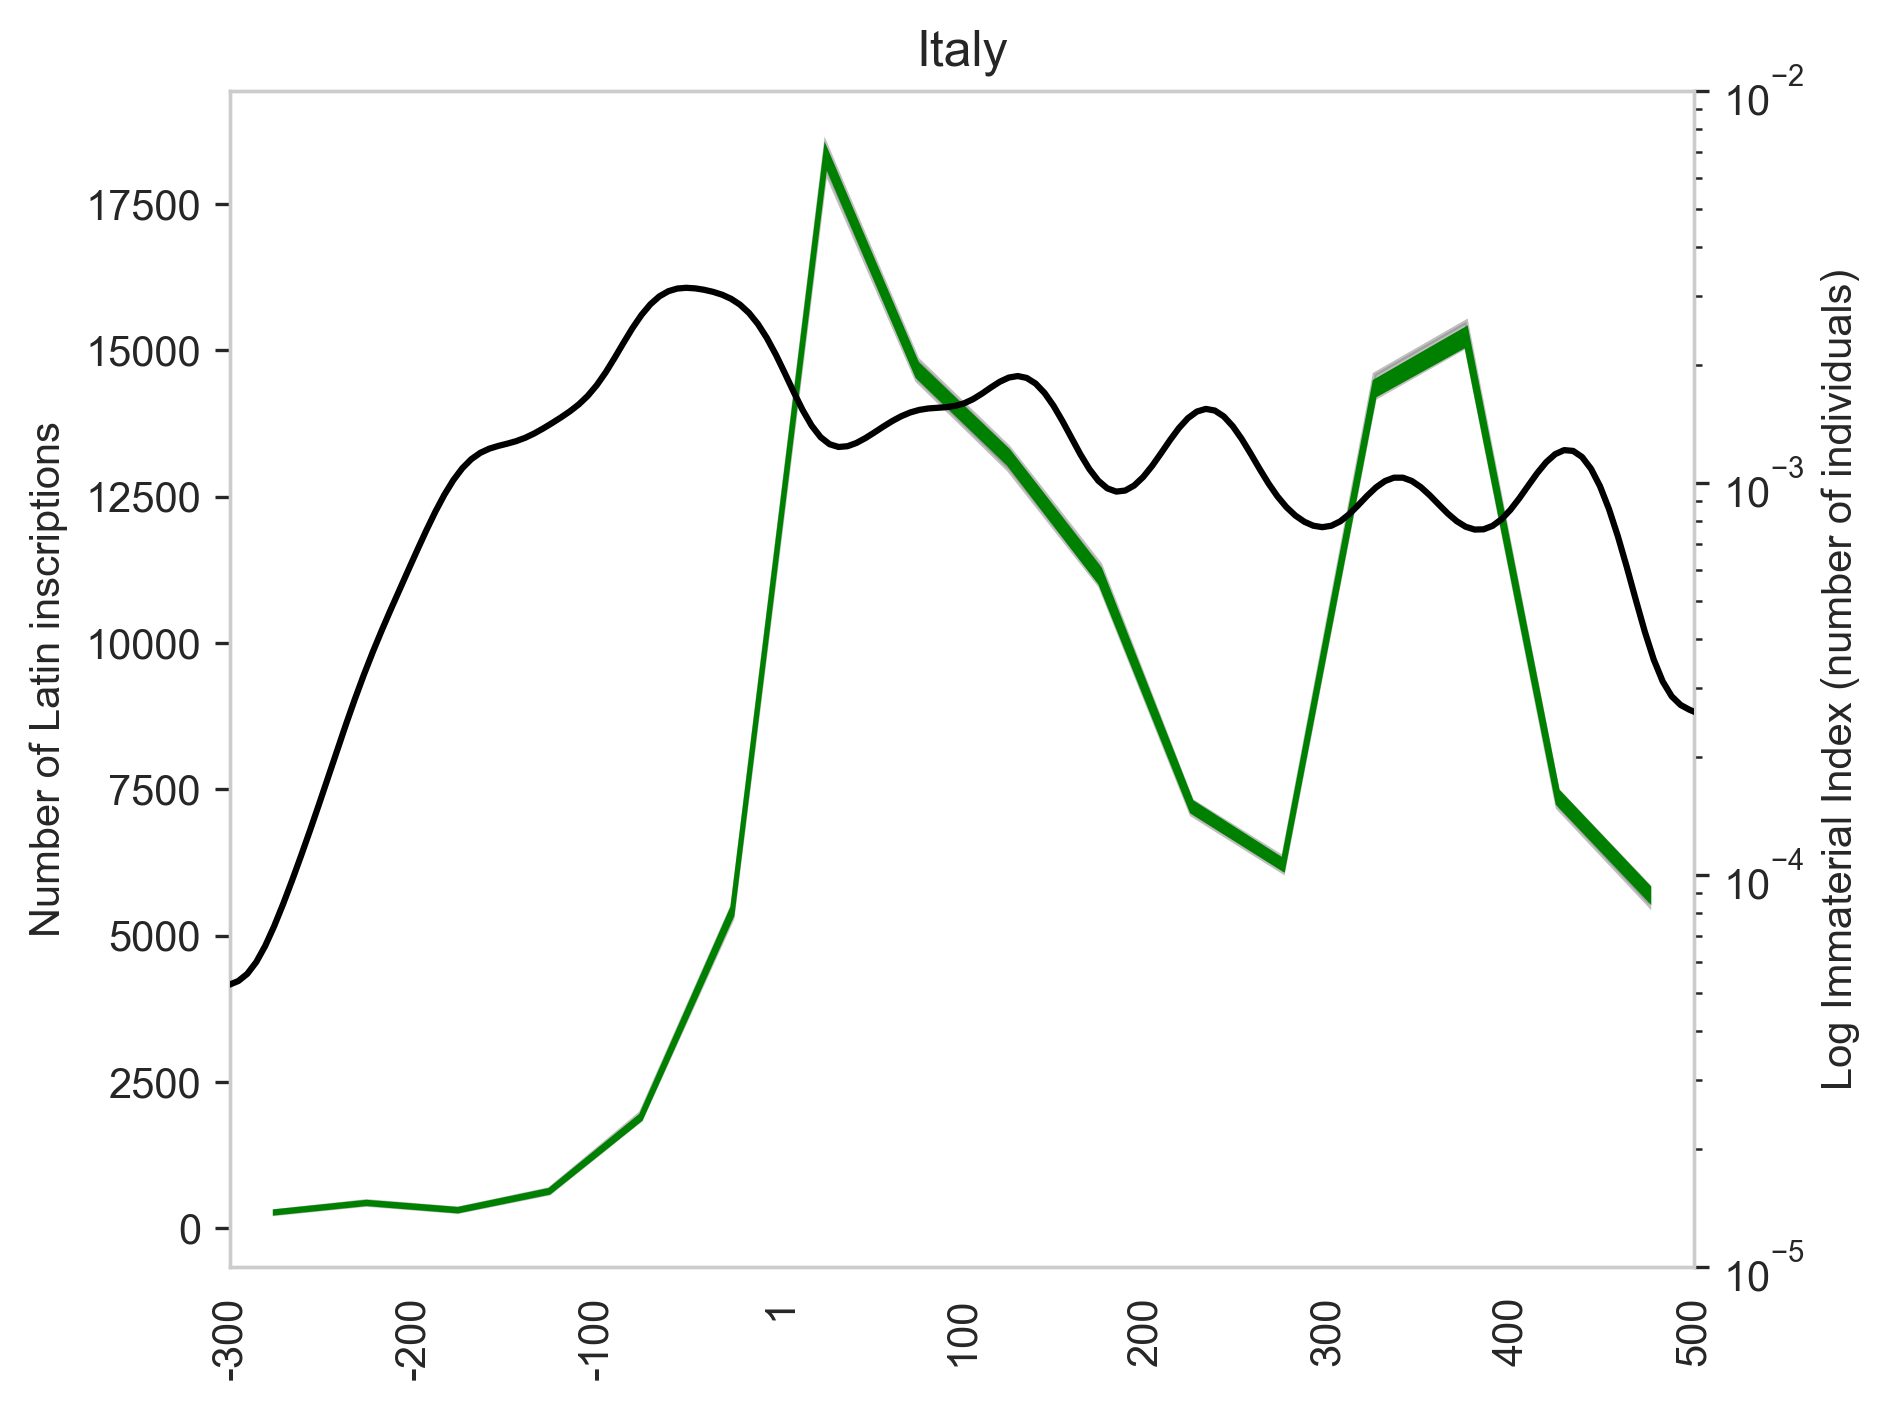

In [133]:
fig, ax3 = plt.subplots(dpi=300, tight_layout=True)

ax3.set_title("Italy")
tempun.timeblocksplot_from_randoms(LIST[LIST["name"]=="Italy"]["random_dates"], color="green", timeblocks=[-300,500,50], ax=ax3, zorder=2)
ax3.set_xlim(-300,500)
xticks = [n + 1 if n==0 else n for n in range(-300, 600, 100) ]
ax3.set_xticks(xticks)
ax3.set_xticklabels([str(n) for n in xticks], rotation=90)
ax3.set_ylabel("Number of Latin inscriptions")

ax3.grid(False) # put grids behind


ax4 = ax3.twinx()

sns.kdeplot(cultura_latin_world[cultura_latin_world["country_name"]=="Italy"]['birthyear_plus35'], color='black', bw_adjust=0.4, ax=ax4, zorder=10)
# Show the plot
ax4.set_yscale('log')
ax4.set_ylim(1e-5, 1e-2)
ax4.set_ylabel("Log Immaterial Index (number of individuals)")
ax4.set_xlabel("")
ax4.grid(False) # turn off gridlines

In [134]:
fig.savefig("am_figures/italy_cultura&inscriptions")

In [137]:
development_index = pd.read_csv("https://raw.githubusercontent.com/kasev/EpiMR/master/data/ober_development-index.csv")
development_index.head(5)

,year,DI
0,-1300,1.2
1,-1200,1.2
2,-1100,0.8
3,-1000,0.4
4,-900,0.6


NameError: name 'development_index' is not defined

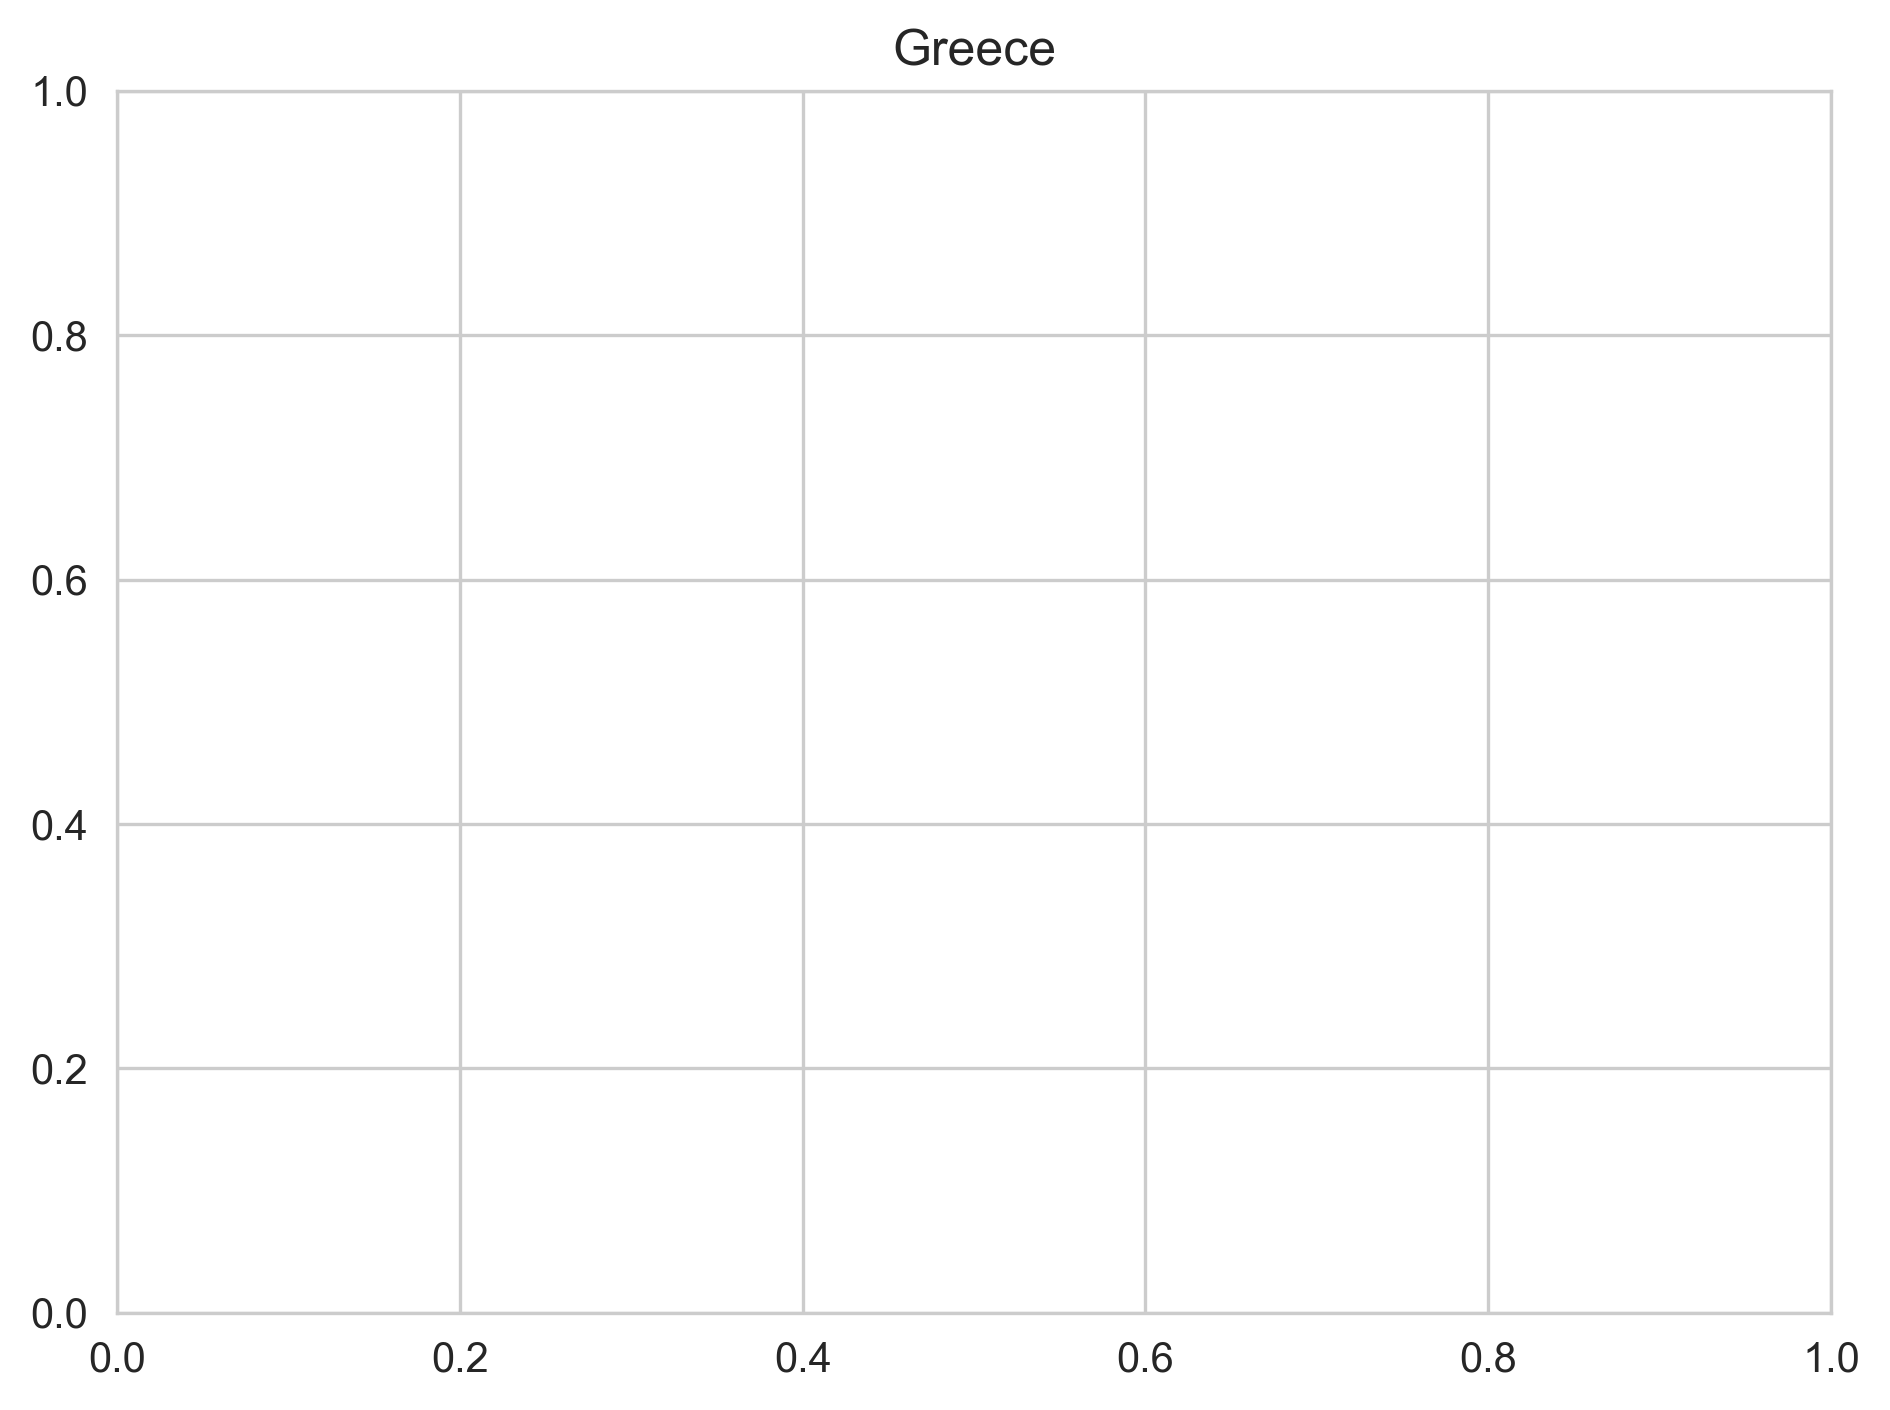

In [69]:
fig, ax1 = plt.subplots(dpi=300, tight_layout=True)

ax1.set_title("Greece")

ax1.plot(development_index["year"], development_index["DI"], color="darkblue")

ax1.set_xlim(-800,500)
ax1.set_xticks(range(-800, 600, 100))
xticks = [n + 1 if n==0 else n for n in range(-800, 600, 100) ]
ax1.set_xticks(xticks)
ax1.set_xticklabels([str(n) for n in xticks], rotation=90)
ax1.set_ylabel("Number of Greek inscriptions")

ax1.grid(False) # put grids behind

ax2 = ax1.twinx()

sns.kdeplot(cultura_greek_world[cultura_greek_world["country_name"]=="Greece"]['birthyear_plus35'], color='black', bw_adjust=0.4, ax=ax2, zorder=10)
# Show the plot
ax2.set_yscale('log')
ax2.set_ylim(1e-5, 1e-2)
ax2.set_ylabel("Log Immaterial Index (number of individuals)")
ax2.set_xlabel("")
ax2.grid(False) # turn off gridlines

In [139]:
fig.savefig("am_figures/greece_cultura&DI.png")

## Cultural Production, combining individual score and modeling temporal uncertainty

In [140]:
cultura_greek_world.head(5)

,individual_wikidata_id,individual_name_x,birthyear,individual_impact_years,country_code,country_name,wikipedia_cultural_score,identifier_score,individual_name_y,region_code,region_name,not_before,not_after,random_dates,birthyear_plus35
301,Q1342867,Polykleitos the Younger,-400.0,-390--340,GRC,Greece,0.104834,11.0,Polykleitos the Younger,re_greek_world,Greek World,-390,-340,"[-346, -389, -352, -345, -367, -369, -390, -37...",-365.0
1066,Q197044,Zeuxis,-500.0,-490--440,GRC,Greece,0.116009,37.0,Zeuxis,re_greek_world,Greek World,-490,-440,"[-452, -445, -476, -443, -451, -487, -468, -44...",-465.0
2460,Q64320,Phradmon,-500.0,-490--440,GRC,Greece,0.102742,6.0,Phradmon,re_greek_world,Greek World,-490,-440,"[-448, -444, -462, -485, -461, -468, -458, -44...",-465.0
3079,Q298071,Hippodamus of Miletus,-497.0,-490--440,TUR,Turkey,0.119432,48.0,Hippodamus of Miletus,re_greek_world,Greek World,-490,-440,"[-479, -452, -465, -476, -482, -462, -477, -47...",-462.0
3632,Q332802,Ibycus,-600.0,-590--540,GRC,Greece,0.116928,53.0,Ibycus,re_greek_world,Greek World,-590,-540,"[-580, -554, -588, -570, -554, -544, -552, -54...",-565.0


In [151]:
cultura_greek_world[cultura_greek_world["individual_name_x"]=="Plato"]

,individual_wikidata_id,individual_name_x,birthyear,individual_impact_years,country_code,country_name,wikipedia_cultural_score,identifier_score,individual_name_y,region_code,region_name,not_before,not_after,random_dates,birthyear_plus35
133831,Q859,Plato,-426.0,-420--370,GRC,Greece,0.825880,226.0,Plato,re_greek_world,Greek World,-420,-370,"[-390, -412, -400, -374, -396, -371, -401, -38...",-391.0
157474,Q446098,Plato,-499.0,-490--440,GRC,Greece,0.103957,19.0,Plato,re_greek_world,Greek World,-490,-440,"[-475, -462, -487, -477, -469, -460, -469, -47...",-464.0


In [141]:
def combine_individual_scores(timeblock_df):
    return timeblock_df["identifier_score"].sum()

cumulative_identifier_score = tempun.sim_data_by_function(cultura_greek_world, 100, [-800, 500, 50], combine_individual_scores)

In [142]:
cumulative_identifier_score[0]

[((-800, -751), 216.0),
 ((-750, -701), 0.0),
 ((-700, -651), 258.0),
 ((-650, -601), 283.0),
 ((-600, -551), 1362.0),
 ((-550, -501), 953.0),
 ((-500, -451), 2682.0),
 ((-450, -401), 2609.0),
 ((-400, -351), 2327.0),
 ((-350, -301), 1448.0),
 ((-300, -251), 1855.0),
 ((-250, -201), 888.0),
 ((-200, -151), 604.0),
 ((-150, -101), 688.0),
 ((-100, -51), 484.0),
 ((-50, -1), 298.0),
 ((1, 50), 661.0),
 ((51, 100), 839.0),
 ((101, 150), 1650.0),
 ((151, 200), 633.0),
 ((201, 250), 1268.0),
 ((251, 300), 474.0),
 ((301, 350), 922.0),
 ((351, 400), 1170.0),
 ((401, 450), 1439.0),
 ((451, 500), 500.0)]

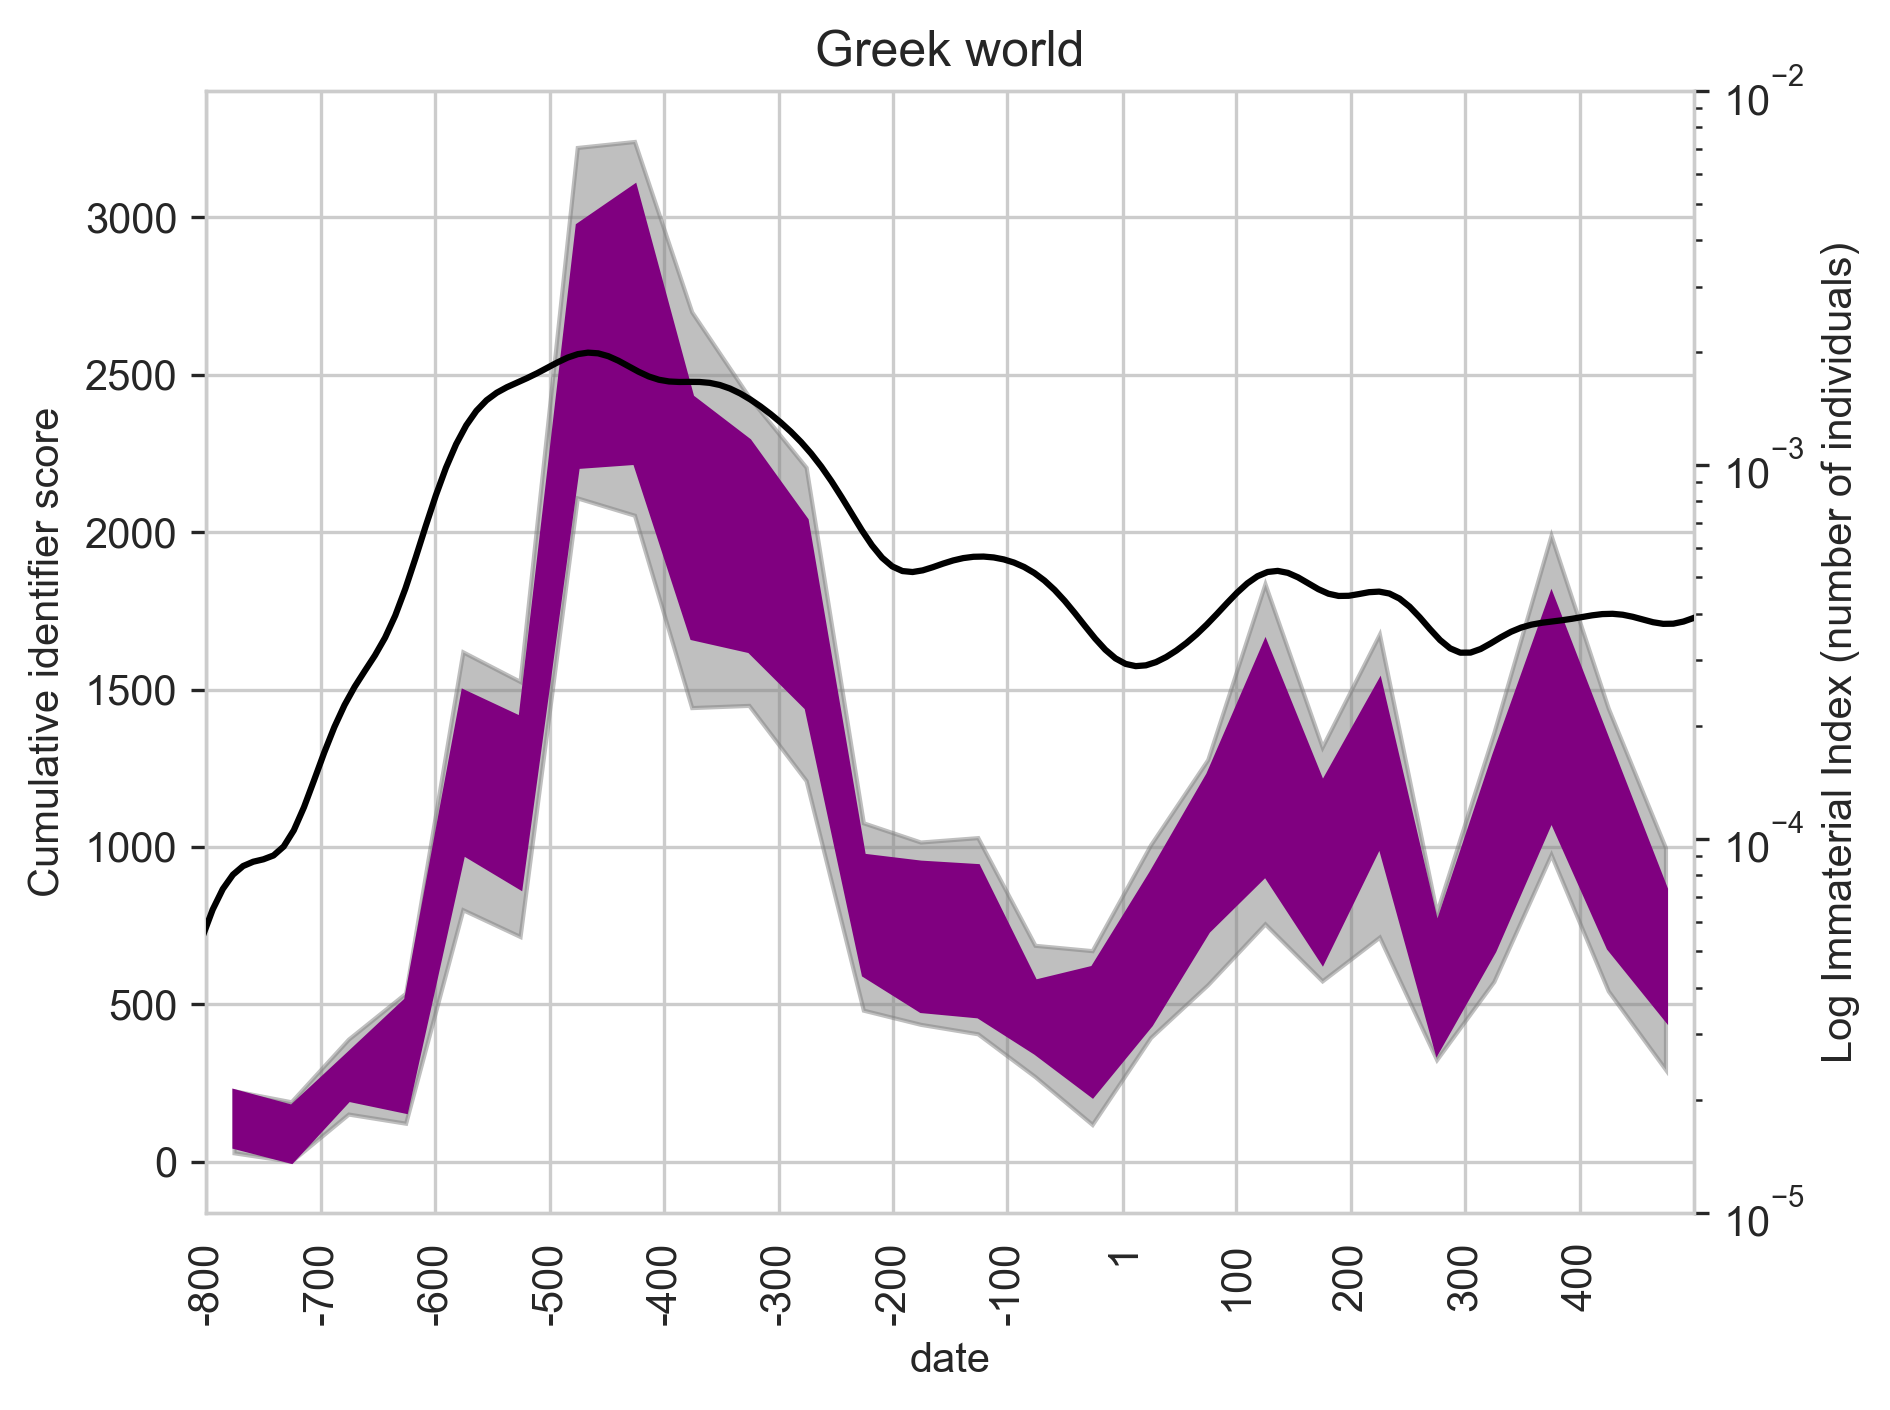

In [148]:
fig, ax1 = plt.subplots(dpi=300, tight_layout=True)

tempun.plot_timeblocks_data(cumulative_identifier_score, color="purple", ax=ax1)
ax1.set_xticks([el + 1 if el == 0 else el for el in range(-800, 500, 100)])
ax1.set_xticklabels([el + 1 if el == 0 else el for el in range(-800, 500, 100)], rotation=90)
ax1.set_xlabel("date")
ax1.set_xlim(-800,500)
ax1.set_ylabel("Cumulative identifier score")

ax1.set_title("Greek world")

ax2 = ax1.twinx()

sns.kdeplot(cultura_greek_world['birthyear_plus35'], color='black', bw_adjust=0.4, ax=ax2, zorder=10)
# Show the plot
ax2.set_yscale('log')
ax2.set_ylim(1e-5, 1e-2)
ax2.set_ylabel("Log Immaterial Index (number of individuals)")
ax2.set_xlabel("")
ax2.grid(False) # turn off gridlines

In [149]:
fig.savefig("am_figures/greece_world_cumulative.png")